# Tonian_Cryogenian_Composite

This Jupyter notebook (developed using a Python 3 kernel) builds upon the carbon isotope composite presented in Swanson-Hysell et al. (2015): 

Swanson-Hysell, N.L., Maloof, A.C., Condon, D.J., Jenkin, G.R.T., Alene, M., Tremblay, M.M., Tesema, T., Rooney, A.D. and Haileab, B. Stratigraphy and geochronology of the Tambien Group, Ethiopia: Evidence for globally synchronous carbon isotope change in the Neoproterozoic.  Geology, (2015), doi:10.1130/G36347.1.

<a href="http://escholarship.org/uc/item/0xw606vp">open access archive </a>| <a href="http://geology.gsapubs.org/content/early/2015/02/26/G36347.1.abstract">link to journal page</a> | <a title="Tambien Media Release Paragraph" href="http://www.swanson-hysell.org/publications/tambien-media-release-paragraph/">non-technical summary</a><br />

In that manuscript, new carbon isotope data and U-Pb dates are presented from the Tambien Group of northern Ethiopia. These data are used to constrain a composite carbon isotope curve that also contains data from other basins which was presented in Fig 2c.

## Import Modules

### Built-in

This code uses functions from modules that are core packages of scientific python (http://scipy.org/). 

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('chained_assignment',None)
import matplotlib.pyplot as plt
import numpy as np
import statistics
import matplotlib.patches as patches
%matplotlib inline

### Other

ChemostratigraphyFunctions.py includes all functions imported below.

A brief description of each function follows:
* **age_model**:
    * generate an age model for any given section.
* **create_tonian_csv**:
    * Take in selected sections, output collated data into a single sorted .csv. Only critical columns are saved.
* **sr_variance**:
    * for a given interval of $[Sr]$, determine the variance in $^{87}Sr/^{86}Sr$.
* **threshold_visualize**:
    * plot $[Sr]$ vs $^{87}Sr/^{86}Sr$ and [Mn]/[Sr] vs $^{87}Sr/^{86}Sr$, with the thresholds marked.
* **tonian_comp_plot**:
    * plot $\delta^{13}C$ and $^{87}Sr/^{86}Sr$ for datasets in the Tonian Composite, for either height or age.
* **tonian_sed_rates**:
    * calculate sedimentation rates for each dataframe, and output as interactive html.
* **shift_chemostratigraphy**:
    * move a data point to a new location, linearly shifting all points between two anchors.
    
The reader is referred to the commented file for details on implementation.

In [2]:
from ChemostratigraphyFunctions import age_model
from ChemostratigraphyFunctions import create_tonian_csv
from ChemostratigraphyFunctions import sr_variance
from ChemostratigraphyFunctions import threshold_visualize
from ChemostratigraphyFunctions import tonian_comp_plot
from ChemostratigraphyFunctions import section_sed_rates
from ChemostratigraphyFunctions import shift_chemostratigraphy

## Age Model Parameters

The composite $\delta^{13}\mathrm{C}$ curve presented above and developed below uses the following dates to construct the age model. Some of these dates correspond to events that are taken to be correlateable chronostratigraphic markers (e.g. the initiation of Sturtian Glaciation and the start of the Bitter Springs Stage). Others are specific to a given basin. In some cases these dates are well-constrained with data. For example, at meter level 1202 in the T1 section there is a U-Pb date of 787.38 ± 0.14 Ma which is used as the constraint. In other cases, the age constraints are poor and are choosen such that they are consistent with broad existing constraints and the rest of the composite (e.g. the base of the Akademikerbreen Group data). 

In [3]:
# Tambien specific parameters
T6_date = 815 # TBD with a date currently arbitrary and set to be same as TS22
T1_0 = 807.9 # would be 807.9 if strictly based on interpolation between TS22 and T1-1202 dates, 
# but interesting to consider if the BSS caused carbonate sedimentation to occur in Tambien
T1_1202 = 787.4 # U-Pb date of 787.38 ± 0.14 Ma 

BSS_start = 809.5
BSS_end = 794.6 # age based on interpolation between TS22 and T1-1202 dates

Ombombo_tuff = 759.3 # dated ash in the Ombombo Group 759.3+/-1.3 at +6 d13C values

Islay_d13C_nadir = 735
#Islay_d13C_0 = 733 # Re-Os date of 732+/-4 (Rooney et al., 2013)
Sturtian_initiation = 717

# Akademikerbreen specific parameters
Akadem_base = 825

# Fifteen Mile specific parameters
Fifteenmile_base = 828
Fifteenmile_date = 811.5
PF1_top = 770
PF3_bottom = 753

# Little Dal specific parameters
Little_Dal_base = 880
Little_Dal_top = 784

# Coates Lake specific parameters
Coates_Lake_Base = 736

# Dalradian specific parameters
Dalradian_Base = 745

## Tonian Data

### Tambien Group data (Swanson-Hysell et al., 2015)

Data from the Tambien Group of northern Ethiopia published in:

Swanson-Hysell, N.L., Maloof, A.C., Condon, D.J., Jenkin, G.R.T., Alene, M., Tremblay, M.M., Tesema, T., Rooney, A.D. and Haileab, B. Stratigraphy and geochronology of the Tambien Group, Ethiopia: Evidence for globally synchronous carbon isotope change in the Neoproterozoic. Geology, (2015), doi:10.1130/G36347.1

In [4]:
Tambien_data = pd.read_csv('../Data/Composite_Data/Tambien.csv')

Filter Sr data:

In [5]:
for i in range(len(Tambien_data.index)):
    # if trace element analysis has not been performed, include it anyway
    if np.isnan(Tambien_data['Sr_ppm'][i]):
        Tambien_data.loc[i,'87Sr/86Sr_primary'] = Tambien_data['87Sr/86Sr'][i]
    
    # filter based on [Sr] and [Mn]/[Sr] thresholds
    else:
        MnSr = Tambien_data['Mn_ppm'][i]/Tambien_data['Sr_ppm'][i]
        if Tambien_data['Sr_ppm'][i]>=500 and MnSr<=0.35:
            Tambien_data.loc[i,'87Sr/86Sr_primary'] = Tambien_data['87Sr/86Sr'][i]

Plot data against meter level:

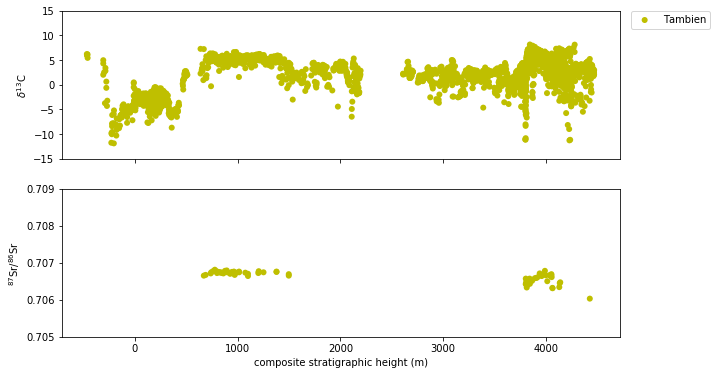

In [6]:
tonian_comp_plot('height',[Tambien_data],['y'],['Tambien'])

Develop the age model:

In [7]:
Tambien_data.sort_values(by='strat_m',inplace=True)
Tambien_data.reset_index(inplace=True,drop=True)

indices = []
constraints = []
for i in range(len(Tambien_data.index)):
    if Tambien_data['section'][i] == 'T6' and Tambien_data['section_height'][i] == 34.7:
        indices.append(i)
        constraints.append(T6_date)
    elif Tambien_data['section'][i] == 'T41' and Tambien_data['section_height'][i] == 159.2:
        indices.append(i)
        constraints.append(BSS_start)
    elif Tambien_data['section'][i] == 'T18' and Tambien_data['section_height'][i] == 730.9:
        indices.append(i)
        constraints.append(BSS_end)
    elif Tambien_data['section'][i] == 'T1' and Tambien_data['section_height'][i] == 1202:
        indices.append(i)
        constraints.append(T1_1202)
    elif Tambien_data['section'][i] == 'T23' and Tambien_data['section_height'][i] == 490.7:
        indices.append(i)
        constraints.append(Islay_d13C_nadir)
    elif Tambien_data['section'][i] == 'T61' and Tambien_data['section_height'][i] == 337.8:
        indices.append(i)
        constraints.append(Sturtian_initiation)

age_model(Tambien_data,constraints,indices)

Plot data against age:

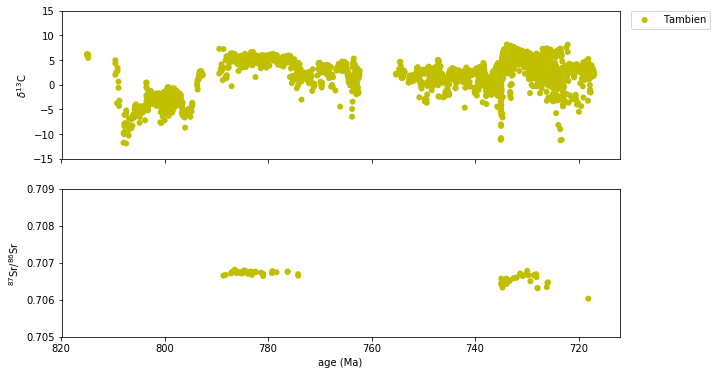

In [8]:
sections = [Tambien_data]
colors = ['y']
labels = ['Tambien']
publications = ['this study, Swanson-Hysell et al. (2010), Miller et al. (2009)']
countries = ['Ethiopia']
formations = ['Tambien Group']
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

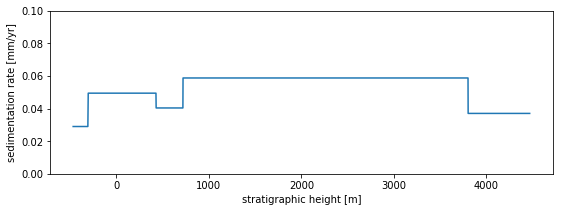

In [9]:
section_sed_rates(Tambien_data, ylims=[0, 0.1])

### Akademikerbreen Group data (Halverson et al., 2007a, Halverson et al., 2007d)

Data from the Akademikerbreen Group of Svalbard published in:

Halverson, G. P., Maloof, A. C., Schrag, D. P., Dudas, F. O., and Hurtgen, M., 2007, Stratigraphy and geochemistry of a ca 800 Ma negative carbon isotope interval in northeastern Svalbard: Chemical Geology, v. 237, n. 1–2, p. 5–27, doi: 10.1016/j.chemgeo.2006.06.013.

Halverson, G.P., Dudás, F.O., Maloof, A.C., and Bowring, S.A., 2007, Evolution of the 87Sr/86Sr composition of Neoproterozoic seawater: Palaeogeography, Palaeoclimatology, Palaeoecology, v. 256, p. 103–129, doi: 10.1016/j.palaeo.2007.02.028.

In [10]:
Akadem_data = pd.read_csv('../Data/Composite_Data/Akademikerbreen.csv')

Filter Sr data:

[Sr] threshold set at 500ppm.
[Mn]/[Sr] threshold set at 0.3


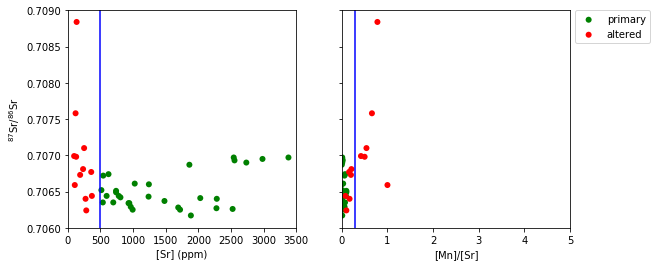

In [11]:
Sr_threshold = 500
MnSr_threshold = 0.3
threshold_visualize([Akadem_data], Sr_threshold, MnSr_threshold, 0.706, 0.709)

In [12]:
for i in range(len(Akadem_data.index)):
    MnSr = Akadem_data['Mn_ppm'][i] / Akadem_data['Sr_ppm'][i]
    if Akadem_data['Sr_ppm'][i] >= 500 and MnSr <= 0.3:
        Akadem_data.loc[i,'87Sr/86Sr_primary'] = Akadem_data['87Sr/86Sr'][i]

Plot data against meter level:

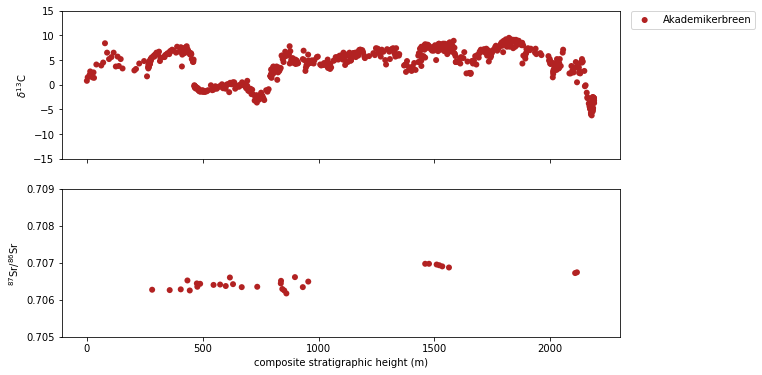

In [13]:
tonian_comp_plot('height',[Akadem_data],['Firebrick'],['Akademikerbreen'])

Develop the age model:

In [14]:
indices = []
constraints = []
for i in range(len(Akadem_data.index)):
    if Akadem_data['strat_m'][i] == 0:
        indices.append(i)
        constraints.append(Akadem_base)
    elif Akadem_data['strat_m'][i] == 434.5 and Akadem_data['d13C'][i] == 7.2:
        indices.append(i)
        constraints.append(BSS_start)
    elif Akadem_data['strat_m'][i] == 792.4:
        indices.append(i)
        constraints.append(BSS_end)
#    elif Akadem_data['strat_m'][i] == 1851.9:
#        indices.append(i)
#        constraints.append(Ombombo_tuff-3)
    elif Akadem_data['strat_m'][i] == 2140.4:
        indices.append(i)
        constraints.append(Islay_d13C_nadir+0.75)
    elif Akadem_data['strat_m'][i] == 2178.8:
        indices.append(i)
        constraints.append(Islay_d13C_nadir)
    elif Akadem_data['strat_m'][i] == 2189.3:
        indices.append(i)
        #constraints.append(Islay_d13C_nadir-1.5)
        constraints.append(Islay_d13C_nadir-0.25)

age_model(Akadem_data,constraints,indices)

Plot data against age:

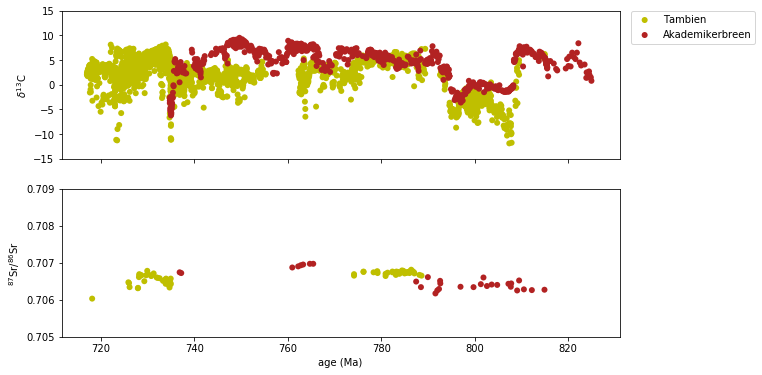

In [15]:
sections.append(Akadem_data)
colors.append('Firebrick')
labels.append('Akademikerbreen')
publications.append('Halverson et al. (2007a), Halverson et al. (2007d)')
countries.append('Svalbard')
formations.append('Akademikerbreen Group')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

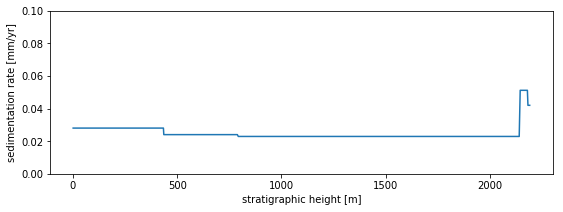

In [16]:
section_sed_rates(Akadem_data, ylims=[0,0.1])

### Bitter Springs Formation data (Swanson-Hysell et al., 2010)

Data from the Bitter Springs Formation of central Australia published in:

Swanson-Hysell, N.L., Rose, C.V., Calmet, C.C., Halverson, G.P., Hurtgen, M.T., and Maloof, A.C., 2010, Cryogenian glaciation and the onset of carbon-isotope decoupling: Science, v. 328, p. 608–611, doi:10.1126/science.1184508.

In [17]:
BSF_data = pd.read_csv('../Data/Composite_Data/BitterSpringFm.csv')

Plot data against meter level:

Sr data not available for Bitter Springs


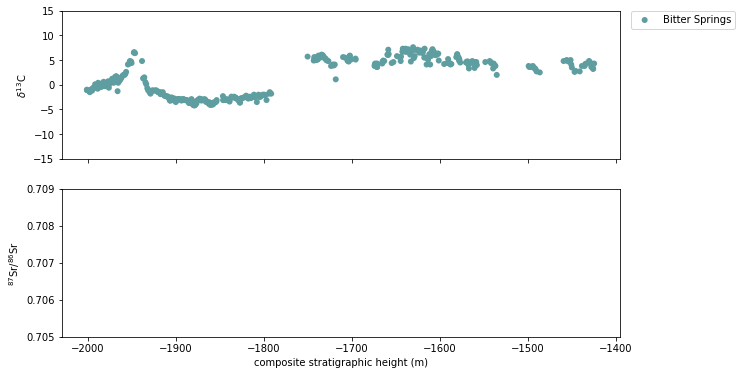

In [18]:
tonian_comp_plot('height',[BSF_data],['cadetblue'],['Bitter Springs'])

Develop the age model:

In [19]:
indices = []
constraints = []
for i in range(len(BSF_data.index)):
    if BSF_data['strat_m'][i] == -2000.9:
        indices.append(i)
        constraints.append(Fifteenmile_base-2)
    elif BSF_data['strat_m'][i] == -1949.6:
        indices.append(i)
        constraints.append(Fifteenmile_base-12)
    elif BSF_data['strat_m'][i] == -1947.5:
        indices.append(i)
        constraints.append(BSS_start)
    elif BSF_data['strat_m'][i] == -1791.4:
        indices.append(i)
        constraints.append(BSS_end)
    elif BSF_data['strat_m'][i] == -1424.2:
        indices.append(i)
        constraints.append(Ombombo_tuff)
        
age_model(BSF_data,constraints,indices)

Plot data against age:

Sr data not available for Bitter Springs


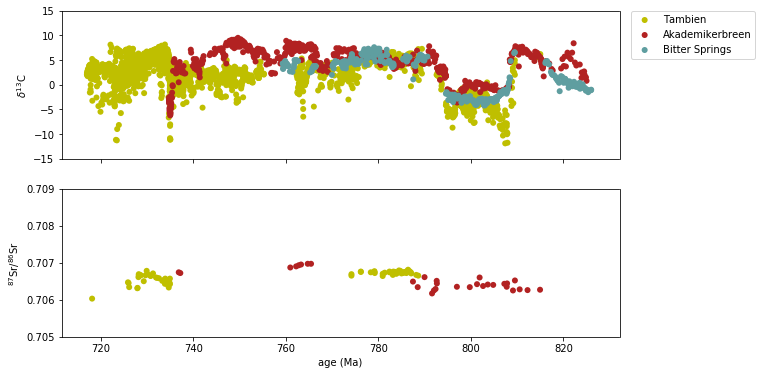

In [20]:
sections.append(BSF_data)
colors.append('cadetblue')
labels.append('Bitter Springs')
publications.append('Swanson-Hysell et al. (2010)')
countries.append('Australia')
formations.append('Bitter Springs Formation')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

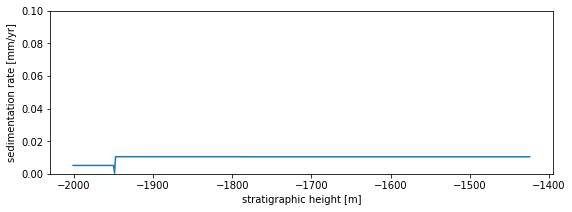

In [21]:
section_sed_rates(BSF_data, ylims=[0,0.1])

### Fifteenmile Group data (Macdonald et al., 2010)

Data from the Fifteenmile Group of northwest Canada published in:

Macdonald, F.A., Schmitz, M.D., Crowley, J.L., Roots, C.F., Jones, D.S., Maloof, A.C., Strauss, J.V., Cohen, P.A., Johnston, D.T., and Schrag, D.P., 2010, Calibrating the Cryogenian: Science, v. 327, p. 1241–1243, doi:10.1126 /science.1183325.

In [22]:
Fifteenmile_data = pd.read_csv('../Data/Composite_Data/Fifteenmile.csv')

Plot data against meter level:

Sr data not available for Fifteenmile


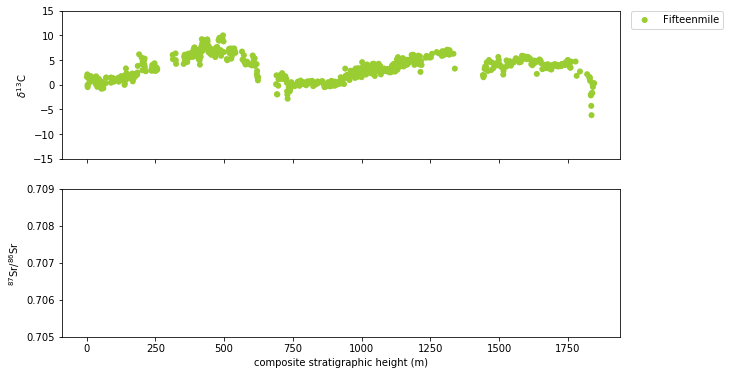

In [23]:
tonian_comp_plot('height',[Fifteenmile_data],['YellowGreen'],['Fifteenmile'])

Develop the age model:

In [24]:
indices = []
constraints = []
for i in range(len(Fifteenmile_data.index)):
    if Fifteenmile_data['sample'][i] == 'F833-1.0':
        indices.append(i)
        constraints.append(Fifteenmile_base)
    elif Fifteenmile_data['sample'][i] == 'F834-147.0':
        indices.append(i)
        constraints.append(Fifteenmile_date)
    elif Fifteenmile_data['sample'][i] == 'F836-0.3':
        indices.append(i)
        constraints.append(BSS_end)
    elif Fifteenmile_data['sample'][i] == 'F836-399.0':
        indices.append(i)
        constraints.append(PF1_top)
    elif Fifteenmile_data['sample'][i] == 'F836-501.0':
        indices.append(i)
        constraints.append(PF3_bottom)
    elif Fifteenmile_data['sample'][i] == 'F836-891.0':
        indices.append(i)
        constraints.append(Islay_d13C_nadir+0.3)
    elif Fifteenmile_data['sample'][i] == 'F836-896.0':
        indices.append(i)
        constraints.append(Islay_d13C_nadir)
    elif Fifteenmile_data['sample'][i] == 'F836-905.5':
        indices.append(i)
        #constraints.append(Islay_d13C_nadir+0.6)
        constraints.append(Islay_d13C_nadir-0.2)

age_model(Fifteenmile_data,constraints,indices)

Plot data against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile


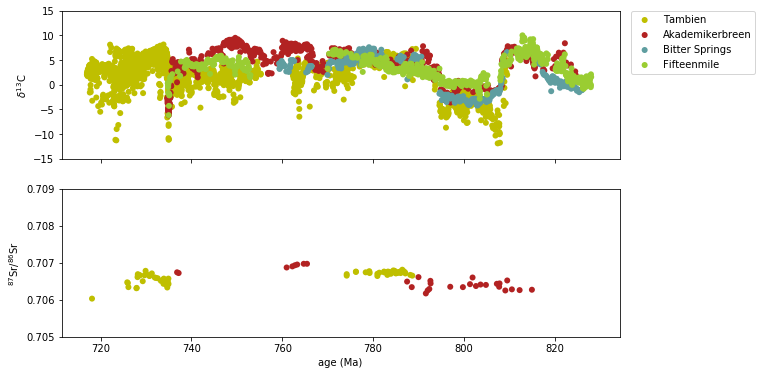

In [25]:
sections.append(Fifteenmile_data)
colors.append('YellowGreen')
labels.append('Fifteenmile')
publications.append('Macdonald et al. (2010)')
countries.append('Canada')
formations.append('Fifteenmile Group')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

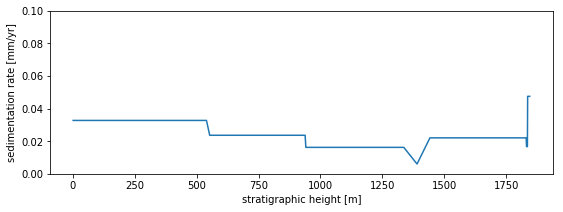

In [26]:
section_sed_rates(Fifteenmile_data, ylims=[0,0.1])

### Little Dal and Coates Lake groups (Halverson et al., 2006; Halverson et al., 2007d)

Data from the Little Dal and Coates Lake Groups of northwest Canada published in:

Halverson, G.P., 2006, A Neoproterozoic chronology, in Xiao, S., and Kaufman, A.J., eds., Neoproterozoic Geobiology and Paleobiology: New York, Springer, Topics in Geobiology, v. 27, p. 231–271.

Halverson, G.P., Dudás, F.O., Maloof, A.C., and Bowring, S.A., 2007, Evolution of the 87Sr/86Sr composition of Neoproterozoic seawater: Palaeogeography, Palaeoclimatology, Palaeoecology, v. 256, p. 103–129, doi: 10.1016/j.palaeo.2007.02.028.

In [27]:
LittleDal_data = pd.read_csv('../Data/Composite_Data/LittleDal.csv')
CoatesLake_data = pd.read_csv('../Data/Composite_Data/CoatesLake_H06.csv')

Filter Sr data:

[Sr] threshold set at 250ppm.
[Mn]/[Sr] threshold set at 0.15


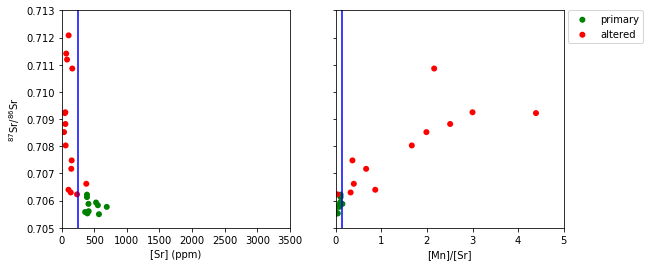

In [28]:
Sr_threshold = 250
MnSr_threshold = 0.15
threshold_visualize([LittleDal_data], Sr_threshold, MnSr_threshold, 0.705, 0.713)

In [29]:
for i in range(len(LittleDal_data.index)):
    MnSr = LittleDal_data['Mn_ppm'][i] / LittleDal_data['Sr_ppm'][i]
    if LittleDal_data['Sr_ppm'][i] >= 250 and MnSr <= 0.15:
        LittleDal_data.loc[i,'87Sr/86Sr_primary'] = LittleDal_data['87Sr/86Sr'][i]

Plot data against meter level:

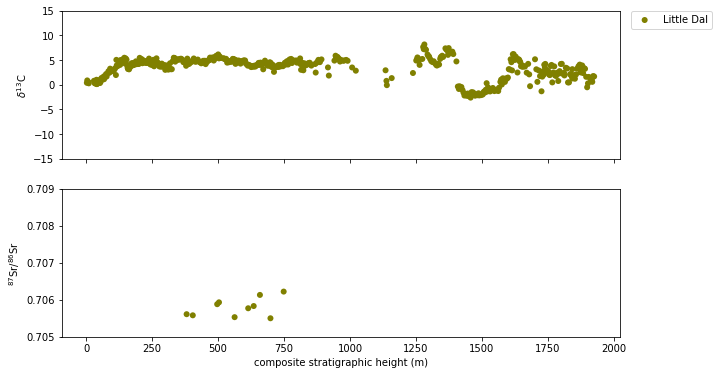

In [30]:
tonian_comp_plot('height',[LittleDal_data],['olive'],['Little Dal'])

Develop the age model:

In [31]:
indices = []
constraints = []
for i in range(len(LittleDal_data.index)):
    if LittleDal_data['strat_m'][i] == 0:
        indices.append(i)
        constraints.append(Little_Dal_base)
    elif LittleDal_data['sample'][i] == 'G12-1122.2':
        indices.append(i)
        constraints.append(BSS_start)
    elif LittleDal_data['sample'][i] == 'G12-1288.8':
        indices.append(i)
        constraints.append(BSS_end)
    elif LittleDal_data['sample'][i] == 'G12-1644.0':
        indices.append(i)
        constraints.append(Little_Dal_top)

age_model(LittleDal_data,constraints,indices)

Plot data against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile


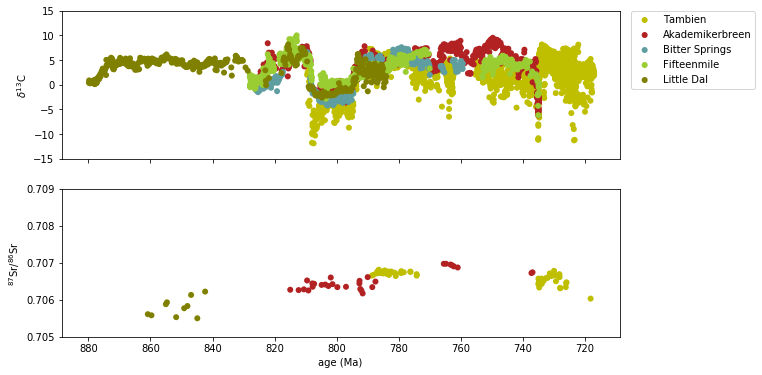

In [32]:
sections.append(LittleDal_data)
colors.append('olive')
labels.append('Little Dal')
publications.append('Halverson et al. (2006), Halverson et al. (2007d)')
countries.append('Canada')
formations.append('Little Dal Group')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

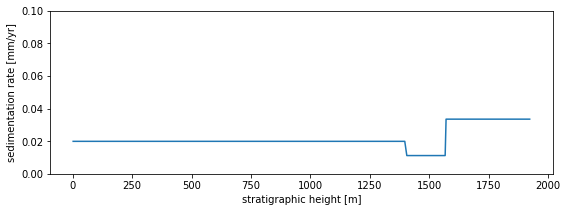

In [33]:
section_sed_rates(LittleDal_data, ylims=[0,0.1])

Tag all Sr data as primary:

In [34]:
# no filtering required
for i in range(len(CoatesLake_data.index)):
    CoatesLake_data.loc[i,'87Sr/86Sr_primary'] = CoatesLake_data['87Sr/86Sr'][i]

Plot data against meter level:

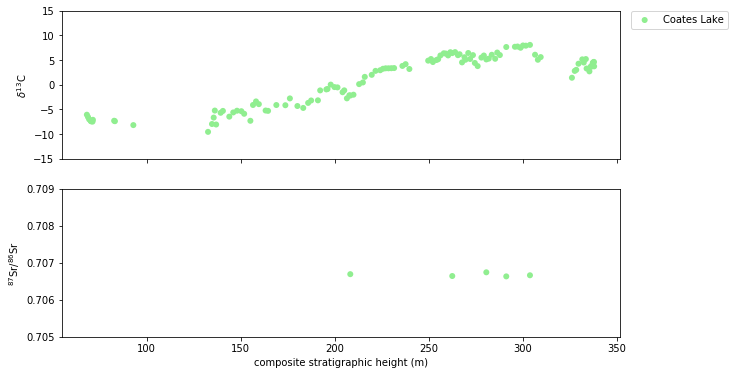

In [35]:
tonian_comp_plot('height',[CoatesLake_data],['lightgreen'],['Coates Lake'])

Develop the age model:

In [36]:
indices = []
constraints = []
for i in range(len(CoatesLake_data.index)):
    if CoatesLake_data['sample'][i] == 'H119-68.3':
        indices.append(i)
        #constraints.append(Coates_Lake_Base)
        constraints.append(Coates_Lake_Base-0.75)
    elif CoatesLake_data['sample'][i] == 'H119-134.8':
        indices.append(i)
        constraints.append(Islay_d13C_nadir)
    elif CoatesLake_data['sample'][i] == 'H119-230.7':
        indices.append(i)
        constraints.append(Islay_d13C_nadir-0.25)
    elif CoatesLake_data['sample'][i] == 'H119-356.8':
        indices.append(i)
        #constraints.append(Sturtian_initiation+8)
        constraints.append(Sturtian_initiation+17)

age_model(CoatesLake_data,constraints,indices)

Plot data against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile


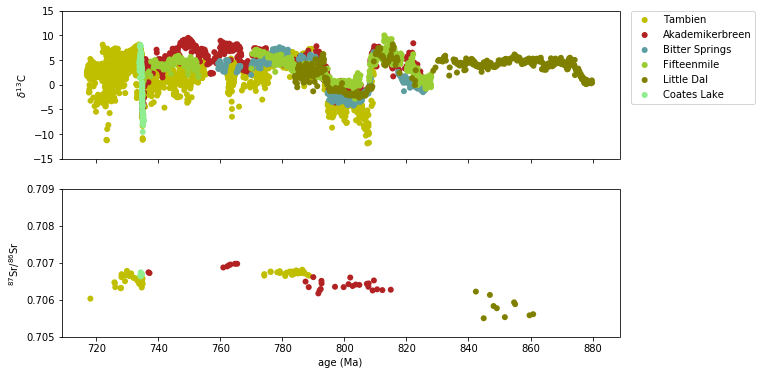

In [37]:
sections.append(CoatesLake_data)
colors.append('lightgreen')
labels.append('Coates Lake')
publications.append('Halverson et al. (2006), Halverson et al. (2007d)')
countries.append('Canada')
formations.append('Coates Lake Group')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

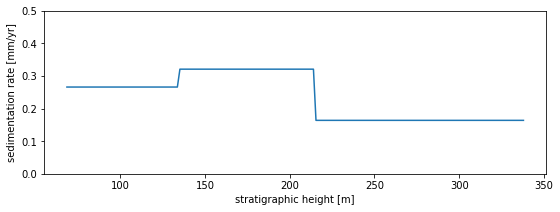

In [38]:
section_sed_rates(CoatesLake_data, ylims=[0,0.5])

### Coates Lake Group (Coppercap Formation) data (Rooney et al., 2014)

Data from the Coopercap Formation of the Coates Lake Groups of northwest Canada published in:

In [39]:
Coppercap_data = pd.read_csv('../Data/Composite_Data/CoatesLake_R14.csv')

Filter Sr data:

In [40]:
for i in range(len(Coppercap_data.index)):
    # filter based on carbonate percent and [Sr] thresholds, and 87Sr/86Sr variance
    if Coppercap_data['carb_percent'][i]>=90 and\
    Coppercap_data['Sr_ppm'][i]>=650 and\
    Coppercap_data['87Sr/86Sr'][i]<=0.708:
        Coppercap_data.loc[i,'87Sr/86Sr_primary'] = Coppercap_data['87Sr/86Sr'][i]

Plot data against meter level:

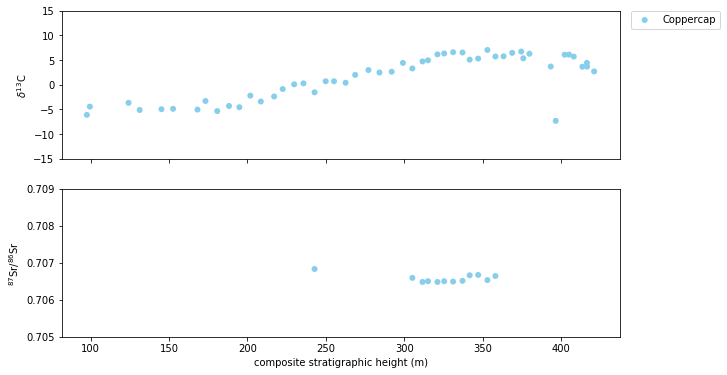

In [41]:
tonian_comp_plot('height',[Coppercap_data],['skyblue'],['Coppercap'])

Remove the anomalous $\delta^{13}$C point:

In [42]:
for i in range(len(Coppercap_data.index)):
    if Coppercap_data['sample'][i] == 83:
        Coppercap_data.loc[i, 'd13C'] = float('NaN')

Develop the age model:

In [43]:
indices = []
constraints = []
for i in range(len(Coppercap_data.index)):
    if Coppercap_data['sample'][i] == 125:
        indices.append(i)
        #constraints.append(Islay_d13C_nadir+0.1)
        constraints.append(Islay_d13C_nadir)
#    elif Coppercap_data['sample'][i] == 106:
#        indices.append(i)
#        constraints.append(Islay_d13C_0)
    elif Coppercap_data['sample'][i] == 76:
        indices.append(i)
        #constraints.append(Islay_d13C_0-2)
        constraints.append(Islay_d13C_nadir-0.25)

age_model(Coppercap_data,constraints,indices)

Plot data against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile


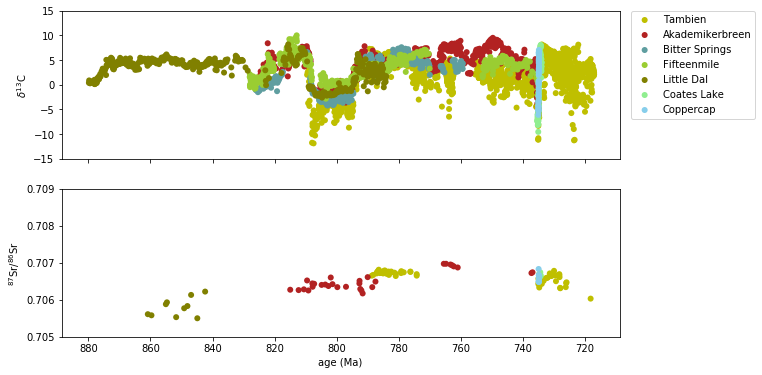

In [44]:
sections.append(Coppercap_data)
colors.append('skyblue')
labels.append('Coppercap')
publications.append('Rooney et al. (2014)')
countries.append('Canada')
formations.append('Coppercap Formation')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

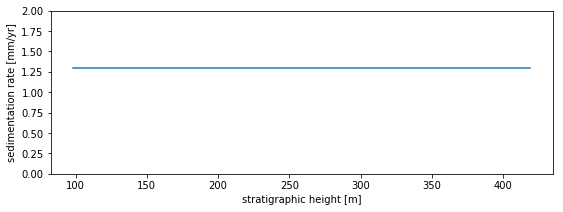

In [45]:
section_sed_rates(Coppercap_data, ylims=[0,2])

### Dalradian Supergroup data (Sawaki et al., 2010)

Data from the Dalradian Supergroup of Scotland published in:

In [46]:
Dalradian_data = pd.read_csv('../Data/Composite_Data/Dalradian.csv')

Remove data without stratigraphic control:

In [47]:
Dalradian_data = Dalradian_data[Dalradian_data['formation']!='Bonahaven']

Filter Sr data:

[Sr] threshold set at 1000ppm.
[Mn]/[Sr] threshold set at 0.2


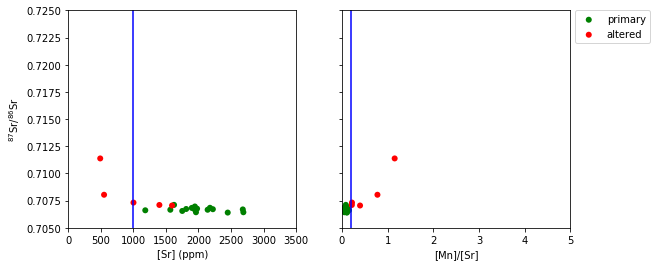

In [48]:
Sr_threshold = 1000
MnSr_threshold = 0.2
threshold_visualize([Dalradian_data], Sr_threshold, MnSr_threshold, 0.705, 0.725)

In [49]:
for i in range(len(Dalradian_data.index)):
    # filter based on [Sr] and [Mn]/[Sr] thresholds
    MnSr = Dalradian_data['Mn_ppm'][i] / Dalradian_data['Sr_ppm'][i]
    if Dalradian_data['Sr_ppm'][i]>=1000 and MnSr<=0.2:
        Dalradian_data.loc[i,'87Sr/86Sr_primary'] = Dalradian_data['87Sr/86Sr'][i]

Plot data against meter level:

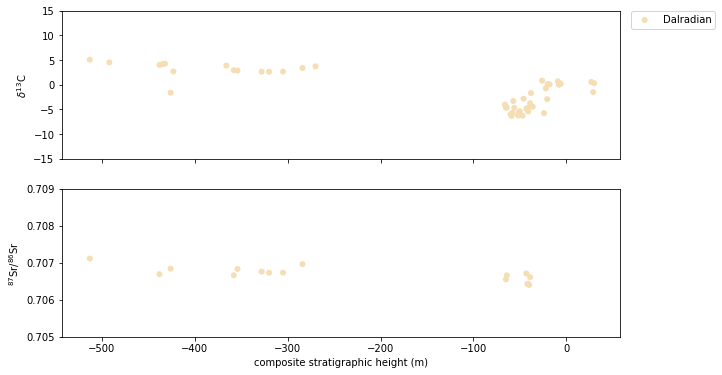

In [50]:
tonian_comp_plot('height',[Dalradian_data],['wheat'],['Dalradian'])

Develop the age model:

In [51]:
indices = []
constraints = []
for i in range(len(Dalradian_data.index)):
    if Dalradian_data['sample'][i] == 'ISS47':
        indices.append(i)
        constraints.append(Dalradian_Base)
    elif Dalradian_data['sample'][i] == 'GE6':
        indices.append(i)
        constraints.append(Islay_d13C_nadir)
#    elif Dalradian_data['sample'][i] == 'GE60':
#        indices.append(i)
#        constraints.append(Islay_d13C_0)
    elif Dalradian_data['sample'][i] == 'GE96':
        indices.append(i)
        constraints.append(Islay_d13C_nadir-0.25)

age_model(Dalradian_data,constraints,indices)

Plot data against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile


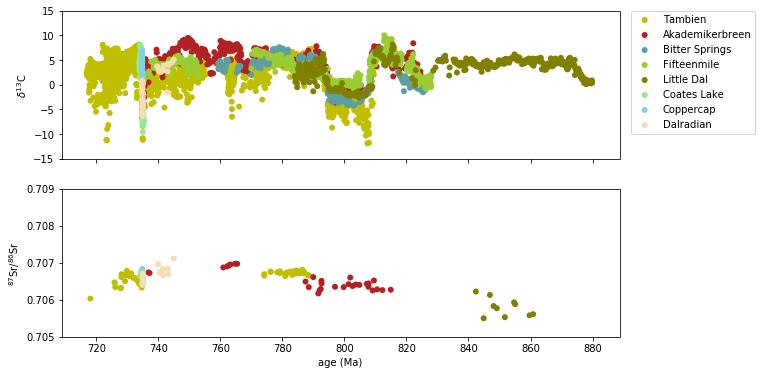

In [52]:
sections.append(Dalradian_data)
colors.append('wheat')
labels.append('Dalradian')
publications.append('Sawaki et al. (2010)')
countries.append('Scotland')
formations.append('Dalradian Supergroup')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

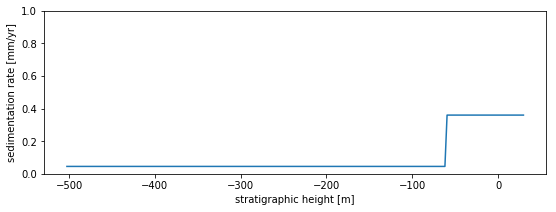

In [53]:
section_sed_rates(Dalradian_data, ylims=[0,1])

### Shaler Supergroup (Asmerom et al., 1991 and Jones et al., 2010)

Data from the Shaler Supergroup of Canada published in:

In [54]:
Shaler_A91_data = pd.read_csv('../Data/Composite_Data/Shaler_A91.csv')
Shaler_J10_data = pd.read_csv('../Data/Composite_Data/Shaler_J10.csv')

Filter Sr data:

Note that all samples exhibit very low [Sr] - in other sections, almost all of this data would be considered unreliable, but here we lack other data, so we will use it for now:

[Sr] threshold set at 0ppm.
[Mn]/[Sr] threshold set at 1.5


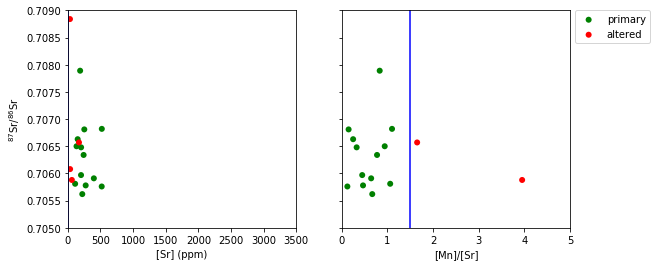

In [55]:
Shaler_A91_data['Mn_ppm'] = Shaler_A91_data['Mn/Sr'] * Shaler_A91_data['Sr_ppm']

Sr_threshold = 0
MnSr_threshold = 1.5
threshold_visualize([Shaler_A91_data], Sr_threshold, MnSr_threshold, 0.705, 0.709)

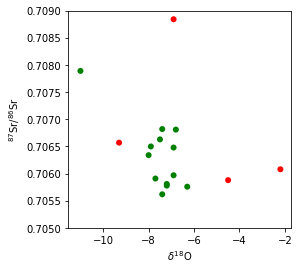

In [56]:
fig, ax = plt.subplots(figsize=(4,4))
for i in range(len(Shaler_A91_data.index)):
    # color based on Mn/Sr threshold set above
    if Shaler_A91_data['Mn/Sr'][i] <= MnSr_threshold:
        ax.scatter(Shaler_A91_data['d18O'][i],Shaler_A91_data['87Sr/86Sr'][i], c='g', edgecolors='none')
    else:
        ax.scatter(Shaler_A91_data['d18O'][i],Shaler_A91_data['87Sr/86Sr'][i], c='r', edgecolors='none')
ax.set_xlabel('$\delta^{18}$O')
ax.set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax.set_ylim(0.705,0.709)
plt.show(fig)

In [57]:
for i in range(len(Shaler_A91_data.index)):
    # filter based on Mn/Sr and d18O
    if Shaler_A91_data['Mn/Sr'][i]<=3 and Shaler_A91_data['d18O'][i]>=-10:
        Shaler_A91_data.loc[i,'87Sr/86Sr_primary'] = Shaler_A91_data['87Sr/86Sr'][i]

Develop the composite stratigraphy for the Jones et al. (2010) data:

In [58]:
for i in range(len(Shaler_J10_data.index)):
    if Shaler_J10_data['section'][i]=='S15':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']
    elif Shaler_J10_data['section'][i]=='S16':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+120
    elif Shaler_J10_data['section'][i]=='S1':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+500
    elif Shaler_J10_data['section'][i]=='S2':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+550
    elif Shaler_J10_data['section'][i]=='S14':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+550
    elif Shaler_J10_data['section'][i]=='S6':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+625
    elif Shaler_J10_data['section'][i]=='S7':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+740
    elif Shaler_J10_data['section'][i]=='S11':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+750
    elif Shaler_J10_data['section'][i]=='S10':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+800
    elif Shaler_J10_data['section'][i]=='S4':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+875
    elif Shaler_J10_data['section'][i]=='S9':
        Shaler_J10_data.loc[i,'strat_m'] = Shaler_J10_data.loc[i,'section_strat']+975
        
Shaler_J10_data.sort_values('strat_m',inplace=True)
Shaler_J10_data.reset_index(drop=True,inplace=True)

Plot data against meter level:

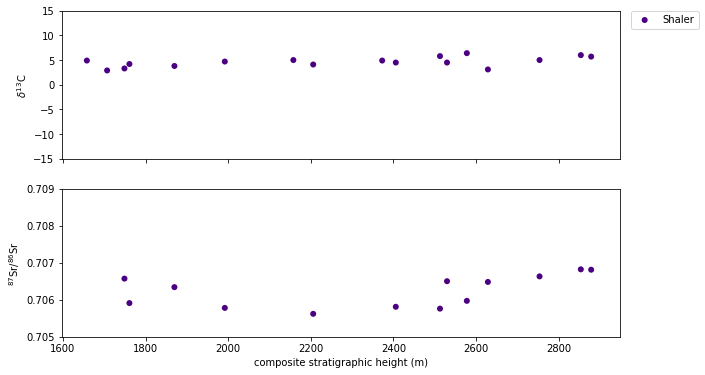

In [59]:
tonian_comp_plot('height',[Shaler_A91_data],['indigo'],['Shaler'])

Sr data not available for Shaler


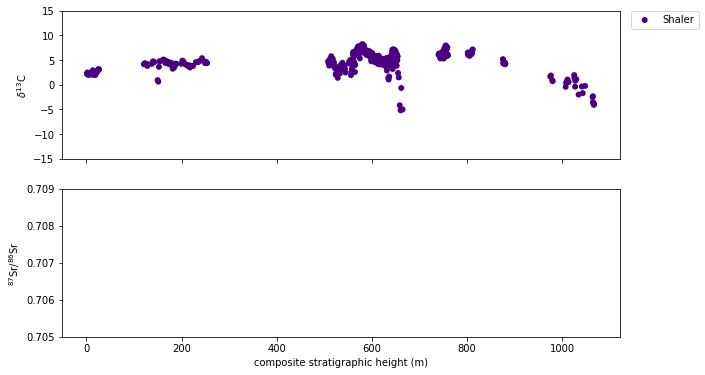

In [60]:
tonian_comp_plot('height',[Shaler_J10_data],['indigo'],['Shaler'])

Develop the age model:

In [61]:
indices = []
constraints = []
for i in range(len(Shaler_J10_data.index)):
    if Shaler_J10_data['strat_m'][i] == 0.8:
        indices.append(i)
        constraints.append(880.0)
    if Shaler_J10_data['strat_m'][i] == 253.5:
        indices.append(i)
        constraints.append(830.0)
    if Shaler_J10_data['strat_m'][i] == 508.2:
        indices.append(i)
        constraints.append(829.0)
    elif Shaler_J10_data['strat_m'][i] == 664.5:
        indices.append(i)
        constraints.append(BSS_start-3)
    elif Shaler_J10_data['strat_m'][i] == 740.2:
        indices.append(i)
        constraints.append(750.0)
    elif Shaler_J10_data['strat_m'][i] == 1067.2:
        indices.append(i)
        constraints.append(Islay_d13C_nadir+1)

age_model(Shaler_J10_data,constraints,indices)

In [62]:
for i in range(len(Shaler_A91_data.index)):
    # create the age column using the equation found in Asmerom et al. (1991)
    Shaler_A91_data.loc[i,'age'] = 880 + 50*np.log(1 - 0.0002847*Shaler_A91_data['strat_m'][i])
    
    # a minor adjustment to final points
    if Shaler_A91_data['age'][i] < 805:
        Shaler_A91_data.loc[i,'age'] = Shaler_A91_data['age'][i] - 10

Plot data against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile


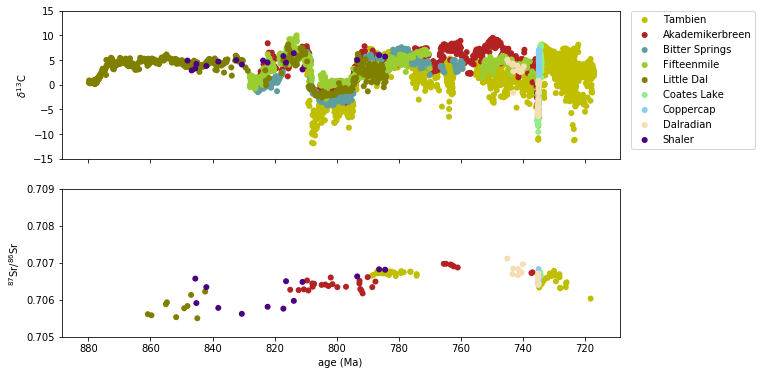

In [63]:
sections.append(Shaler_A91_data)
colors.append('indigo')
labels.append('Shaler')
publications.append('Asmerom et al. (1991)')
countries.append('Canada')
formations.append('Shaler Supergroup')
tonian_comp_plot('age',sections,colors,labels)

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_


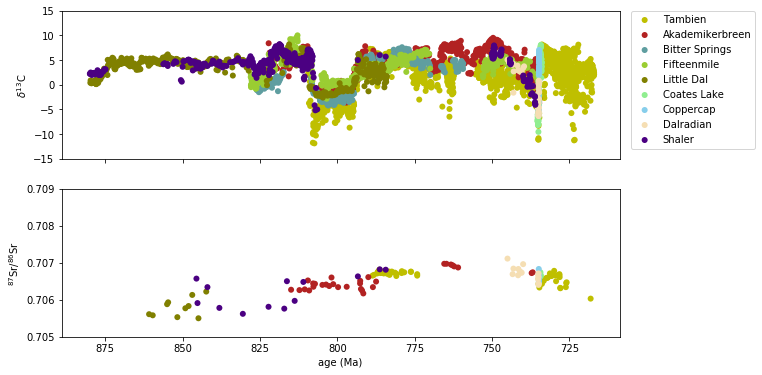

In [64]:
sections.append(Shaler_J10_data)
colors.append('indigo')
labels.append('_nolegend_')
publications.append('Jones et al. (2010)')
countries.append('Canada')
formations.append('Shaler Supergroup')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

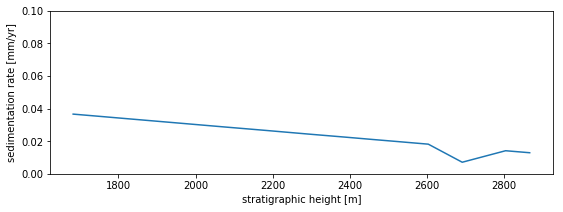

In [65]:
section_sed_rates(Shaler_A91_data, ylims=[0,0.1])

### Karatau Group (Kuznetsov et al., 2006)

Data from the Karatau Group of Siberia published in:

In [66]:
Karatau_data = pd.read_csv('../Data/Composite_Data/Karatau.csv')

Filter Sr data:

[Sr] threshold set at 350ppm.
[Mn]/[Sr] threshold set at 0.1


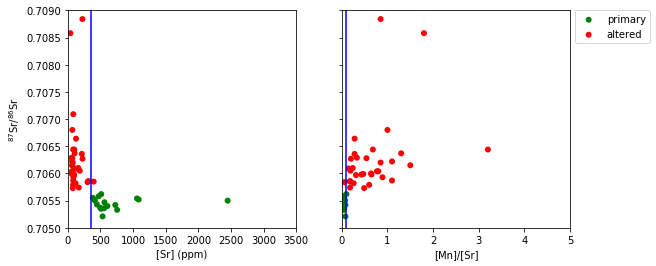

In [67]:
Sr_threshold = 350
MnSr_threshold = 0.1
threshold_visualize([Karatau_data], Sr_threshold, MnSr_threshold, 0.705, 0.709)

In [68]:
for i in range(len(Karatau_data.index)):
    if Karatau_data['Mn/Sr'][i]<=0.1 and Karatau_data['Sr_ppm'][i]>=350:
        Karatau_data.loc[i,'87Sr/86Sr_primary'] = Karatau_data['87Sr/86Sr'][i]

For now, pull out sections that have parimary Sr data and we have some way of estimating the correlations:

In [69]:
Lower_Karatau_data = Karatau_data[(Karatau_data['section']=='Tolparovo-1') |\
                                  (Karatau_data['section']=='Usmangali')]
Upper_Karatau_data = Karatau_data[Karatau_data['section']=='Kurtaza']

Lower_Karatau_data.reset_index(drop=True,inplace=True)
Upper_Karatau_data.reset_index(drop=True,inplace=True)

Correlate stratigraphy in the Lower Karatau:

In [70]:
for i in range(len(Lower_Karatau_data.index)):
    # use Tolparovo-1 as the backbone
    if Lower_Karatau_data['section'][i] == 'Tolparovo-1':
        Lower_Karatau_data.loc[i,'strat_m'] = Lower_Karatau_data['sampling_level'][i]
    # 150m offset is approximated from Figure 2
    elif Lower_Karatau_data['section'][i] == 'Usmangali':
        Lower_Karatau_data.loc[i,'strat_m'] = Lower_Karatau_data['sampling_level'][i] + 375
        
# unconformity between the lower and upper Karatau sections
Upper_Karatau_data['strat_m'] = Upper_Karatau_data['sampling_level']

# sort
Lower_Karatau_data.sort_values('strat_m',inplace=True)
Lower_Karatau_data.reset_index(drop=True,inplace=True)
Upper_Karatau_data.sort_values('strat_m',inplace=True)
Upper_Karatau_data.reset_index(drop=True,inplace=True)

Develop the age model:

In [71]:
# the age model used in Cox et al. (2016), extrapolated to the start/end of the data
indices = []
constraints = []
for i in range(len(Lower_Karatau_data.index)):
    if Lower_Karatau_data['sample'][i] == 'TK-12':
        indices.append(i)
        constraints.append(969.5)
    elif Lower_Karatau_data['sample'][i] == 'TI-0':
        indices.append(i)
        constraints.append(968.1)
    elif Lower_Karatau_data['sample'][i] == 'TI-1':
        indices.append(i)
        constraints.append(967.7)
    elif Lower_Karatau_data['sample'][i] == 'TI-4':
        indices.append(i)
        constraints.append(966.7)
    elif Lower_Karatau_data['sample'][i] == 'TI-7':
        indices.append(i)
        constraints.append(965.8)
    elif Lower_Karatau_data['sample'][i] == 'TI-12':
        indices.append(i)
        constraints.append(964.5)
    elif Lower_Karatau_data['sample'][i] == 'TI-14':
        indices.append(i)
        constraints.append(962.6)
    elif Lower_Karatau_data['sample'][i] == 'TI-16':
        indices.append(i)
        constraints.append(962.1)
    elif Lower_Karatau_data['sample'][i] == 'TI-17':
        indices.append(i)
        constraints.append(961.9)
    elif Lower_Karatau_data['sample'][i] == 'MI-30':
        indices.append(i)
        constraints.append(928.7)

age_model(Lower_Karatau_data,constraints,indices)

indices = []
constraints = []
for i in range(len(Upper_Karatau_data.index)):
    if Upper_Karatau_data['sample'][i] == 'UK-1':
        indices.append(i)
        constraints.append(907.93125)
    elif Upper_Karatau_data['sample'][i] == 'UK-4':
        indices.append(i)
        constraints.append(907.1)
    elif Upper_Karatau_data['sample'][i] == 'UK-6':
        indices.append(i)
        constraints.append(905.2)
    elif Upper_Karatau_data['sample'][i] == 'UK-8':
        indices.append(i)
        constraints.append(904.4)
    elif Upper_Karatau_data['sample'][i] == 'UK-49':
        indices.append(i)
        constraints.append(889.315)

age_model(Upper_Karatau_data,constraints,indices)

Plot data against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_


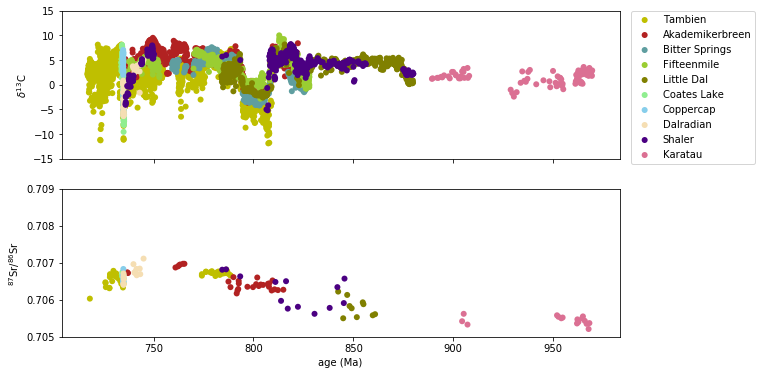

In [72]:
Karatau_data = pd.concat([Lower_Karatau_data,Upper_Karatau_data],ignore_index=True)

sections.append(Karatau_data)
colors.append('palevioletred')
labels.append('Karatau')
publications.append('Kuznetsov et al. (2006)')
countries.append('Siberia')
formations.append('Karatau Group')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

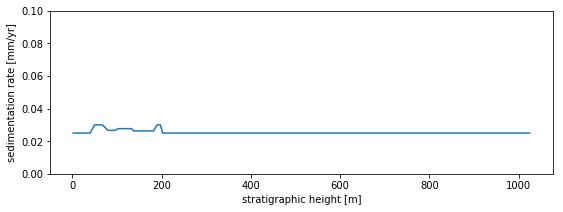

In [73]:
section_sed_rates(Lower_Karatau_data, ylims=[0,0.1])

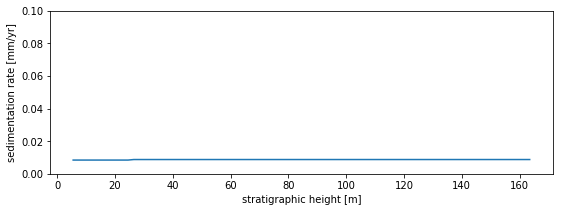

In [74]:
section_sed_rates(Upper_Karatau_data, ylims=[0,0.1])

### Riphean Transition (Bartley et al., 2001)

Data from the Riphean Transition (Turukhansk and Uchur-Maya regions) of Siberia published in:

In [75]:
Riphean_data = pd.read_csv('../Data/Composite_Data/Riphean.csv')

Filter Sr data:

Note that all samples exhibit very low [Sr] - in other sections, almost all of this data would be considered unreliable, but here we lack other data, so we will use it for now:

[Sr] threshold set at 0ppm.
[Mn]/[Sr] threshold set at 0.5


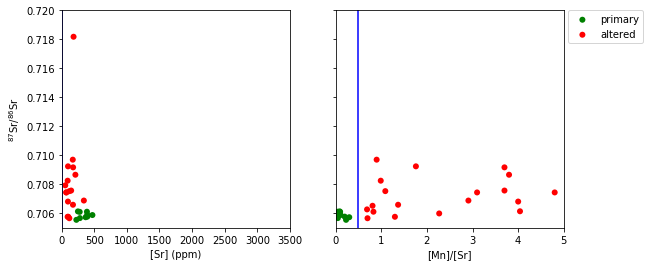

In [76]:
Sr_threshold = 0
MnSr_threshold = 0.5
threshold_visualize([Riphean_data], Sr_threshold, MnSr_threshold, 0.705, 0.720)

In [77]:
for i in range(len(Riphean_data.index)):
    if Riphean_data['Mn/Sr'][i]<=0.5:
        Riphean_data.loc[i,'87Sr/86Sr_primary'] = Riphean_data['87Sr/86Sr'][i]

Ignore upper Formations (above a conformity, and thus unclear how to correlate):

In [78]:
Riphean_data = Riphean_data[(Riphean_data['formation'] == 'Linok') |\
                            (Riphean_data['formation'] == 'S. Tung.') |\
                            (Riphean_data['formation'] == 'Derevnya') |\
                            (Riphean_data['formation'] == 'Burovaya') |\
                            (Riphean_data['formation'] == 'Malgina') |\
                            (Riphean_data['formation'] == 'Tsipanda')]
Riphean_data.reset_index(drop=True,inplace=True)

Correlate the stratigraphy:

In [79]:
for i in range(len(Riphean_data.index)):
    # Turukhansk region data already correlated
    if Riphean_data['region'][i] == 'Turukhansk':
        Riphean_data.loc[i,'strat_m'] = Riphean_data['height'][i]
    # Malgina formation data already correlated
    elif Riphean_data['formation'][i] == 'Malgina':
        Riphean_data.loc[i,'strat_m'] = Riphean_data['height'][i]
    # Tsipanda formation data is recorded as height from base of formation
    elif Riphean_data['formation'][i] == 'Tsipanda':
        Riphean_data.loc[i,'strat_m'] = Riphean_data['height'][i] + 80

Riphean_data.sort_values('strat_m',inplace=True)
Riphean_data.reset_index(drop=True,inplace=True)

Plot data against meter level:

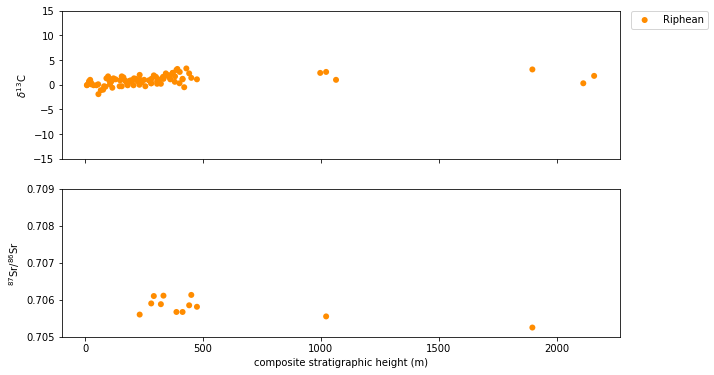

In [80]:
tonian_comp_plot('height',[Riphean_data],['darkorange'],['Riphean'])

Develop the age model:

In [81]:
# use only ages compatible with our correlation from the age model used in Cox et al. (2016)
# extrapolated to the start/end of the data
indices = []
constraints = []
for i in range(len(Riphean_data.index)):
    if Riphean_data['sample'][i] == 'UM-24':
        indices.append(i)
        constraints.append(1060)
    elif Riphean_data['sample'][i] == 'K95-76':
        indices.append(i)
        constraints.append(1037.2)
    elif Riphean_data['sample'][i] == 'K95-79':
        indices.append(i)
        constraints.append(1036.4)
    elif Riphean_data['sample'][i] == 'K95-86':
        indices.append(i)
        constraints.append(1032)
    elif Riphean_data['sample'][i] == 'K95-95':
        indices.append(i)
        constraints.append(1029)
    elif Riphean_data['sample'][i] == 'T-64':
        indices.append(i)
        constraints.append(960.5)
    elif Riphean_data['sample'][i] == 'T-67':
        indices.append(i)
        constraints.append(947.6)

age_model(Riphean_data,constraints,indices)

Plot data against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_


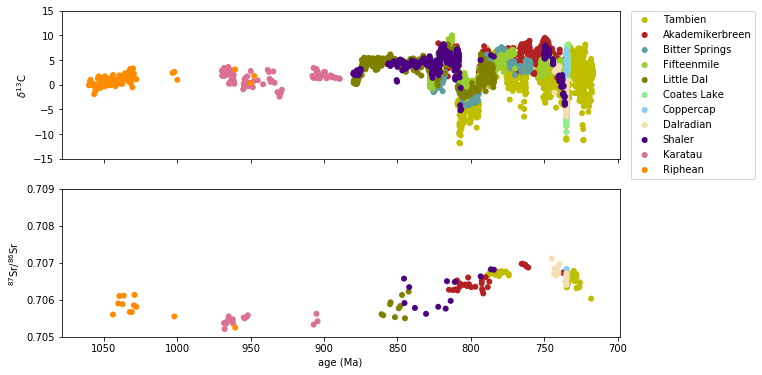

In [82]:
sections.append(Riphean_data)
colors.append('darkorange')
labels.append('Riphean')
publications.append('Bartley et al. (2001)')
countries.append('Siberia')
formations.append('Riphean Transition')
tonian_comp_plot('age',sections,colors,labels)

Sedimentation rates:

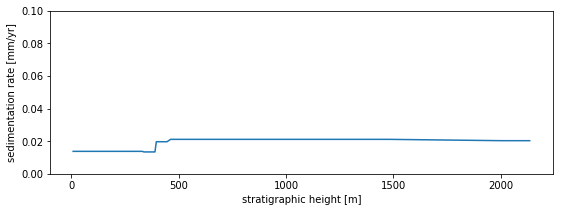

In [83]:
section_sed_rates(Riphean_data, ylims=[0,0.1])

## Cryogenian/Ediacaran Data

### Tsagaan-Olam Group (Bold et al. 2016)

Data from the Tsagaan-Olam Group of SW Mongolia published in:

In [84]:
TsagaanOlam_B16_data = pd.read_csv('../Data/Composite_Data/TsagaanOlam_B16.csv')

Filter Sr data:

[Sr] threshold set at 500ppm.
[Mn]/[Sr] threshold set at 0.3


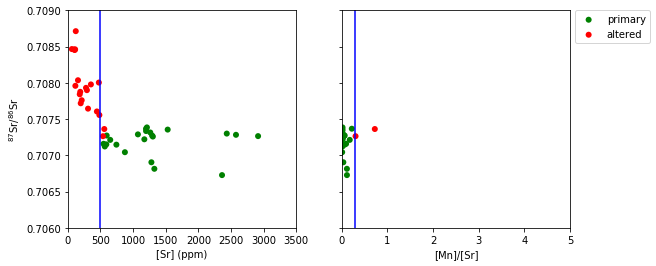

In [85]:
TsagaanOlam_B16_data['Mn_ppm'] = TsagaanOlam_B16_data['Mn/Sr'] * TsagaanOlam_B16_data['Sr_ppm']

Sr_threshold = 500
MnSr_threshold = 0.3
threshold_visualize([TsagaanOlam_B16_data], Sr_threshold, MnSr_threshold, 0.706, 0.709)

In [86]:
for i in range(len(TsagaanOlam_B16_data.index)):
    # if Mn/Sr and [Sr] data exists
    if np.isfinite(TsagaanOlam_B16_data['Mn/Sr'][i]):
        if TsagaanOlam_B16_data['Mn/Sr'][i] <= 0.5 and TsagaanOlam_B16_data['Sr_ppm'][i] >= 500:
            TsagaanOlam_B16_data.loc[i, '87Sr/86Sr_primary'] = TsagaanOlam_B16_data['87Sr/86Sr'][i]
    # if only [Sr] data exists
    elif np.isfinite(TsagaanOlam_B16_data['Sr_ppm'][i]):
        if TsagaanOlam_B16_data['Sr_ppm'][i] >= 500:
            TsagaanOlam_B16_data.loc[i, '87Sr/86Sr_primary'] = TsagaanOlam_B16_data['87Sr/86Sr'][i]
    # if neither Mn/Sr nor [Sr] data exists, just accept the value
    elif np.isfinite(TsagaanOlam_B16_data['87Sr/86Sr'][i]):
        TsagaanOlam_B16_data.loc[i, '87Sr/86Sr_primary'] = TsagaanOlam_B16_data['87Sr/86Sr'][i]

Develop the age model. For now, restrict to the most continuous/robust sections:

In [87]:
# from Bold et al. (2016)
Taishir1_base = 660
Taishir_nadir = 653.8
Taishir4_top = 643
Ol_base = 635.2
Shuurgat1_top = 632.5
Shuurgat3_base = 600
Shuurgat4_top = 584
ZA_base = 542.9
ZA_top = 540

# F949 (Taishir Formation)
F949_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='F949']
F949_data.sort_values('strat_m', inplace=True)
F949_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F949_data.index)):
    if F949_data['strat_m'][i] == 0.1:
        indices.append(i)
        constraints.append(Taishir1_base)
    elif F949_data['strat_m'][i] == 389.0:
        indices.append(i)
        constraints.append(Taishir4_top+1)
age_model(F949_data,constraints,indices)

# F948 (Taishir Formation)
F948_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='F948']
F948_data.sort_values('strat_m', inplace=True)
F948_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F948_data.index)):
    if F948_data['strat_m'][i] == 326.1:
        indices.append(i)
        constraints.append(Taishir1_base)
    elif F948_data['strat_m'][i] == 345.0:
        indices.append(i)
        constraints.append(Taishir1_base-0.5)
age_model(F948_data,constraints,indices)

# F701 (Taishir Formation)
F701_data = TsagaanOlam_B16_data[(TsagaanOlam_B16_data['section']=='F701') & (TsagaanOlam_B16_data['unit']=='T1')]
F701_data.sort_values('strat_m', inplace=True)
F701_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F701_data.index)):
    if F701_data['strat_m'][i] == 176.1:
        indices.append(i)
        constraints.append(Taishir1_base)
    elif F701_data['strat_m'][i] == 185.0:
        indices.append(i)
        constraints.append(Taishir1_base-0.4)
age_model(F701_data,constraints,indices)

# F702 (Taishir Formation)
F702_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='F702']
F702_data.sort_values('strat_m', inplace=True)
F702_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F702_data.index)):
    if F702_data['strat_m'][i] == 0.0:
        indices.append(i)
        constraints.append(Taishir1_base)
    elif F702_data['strat_m'][i] == 42.0:
        indices.append(i)
        constraints.append(Taishir1_base-0.9)
age_model(F702_data,constraints,indices)

# F703 (Taishir Formation)
F703_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='F703']
F703_data.sort_values('strat_m', inplace=True)
F703_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F703_data.index)):
    if F703_data['strat_m'][i] == 0.0:
        indices.append(i)
        constraints.append(Taishir1_base-2.2)
    elif F703_data['strat_m'][i] == 78.0:
        indices.append(i)
        constraints.append(Taishir1_base-5.5)
age_model(F703_data,constraints,indices)

# F704 (Taishir Formation)
F704_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='F704']
F704_data.sort_values('strat_m', inplace=True)
F704_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F704_data.index)):
    if F704_data['strat_m'][i] == 122.0:
        indices.append(i)
        constraints.append(Taishir1_base-4)
    elif F704_data['strat_m'][i] == 326.0:
        indices.append(i)
        constraints.append(Taishir_nadir)
    elif F704_data['strat_m'][i] == 566.0:
        indices.append(i)
        constraints.append(Taishir4_top+4)
age_model(F704_data,constraints,indices)

# F708 (Taishir Formation)
F708_data = TsagaanOlam_B16_data[(TsagaanOlam_B16_data['section']=='F708') & (TsagaanOlam_B16_data['unit']=='T4')]
F708_data.sort_values('strat_m', inplace=True)
F708_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F708_data.index)):
    if F708_data['strat_m'][i] == 0.0:
        indices.append(i)
        constraints.append(Taishir4_top+1)
    elif F708_data['strat_m'][i] == 8.0:
        indices.append(i)
        constraints.append(Taishir4_top)
age_model(F708_data,constraints,indices)

# F724 (Ol and Shuurgat Formations)
F724_data = TsagaanOlam_B16_data[(TsagaanOlam_B16_data['section']=='F724') & (TsagaanOlam_B16_data['unit']!='ZA')]
F724_data.sort_values('strat_m', inplace=True)
F724_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F724_data.index)):
    if F724_data['strat_m'][i] == 2.0:
        indices.append(i)
        constraints.append(Ol_base)
    elif F724_data['strat_m'][i] == 124.0:
        indices.append(i)
        constraints.append(Shuurgat1_top)
    elif F724_data['strat_m'][i] == 134.0:
        indices.append(i)
        constraints.append(Shuurgat3_base)
    elif F724_data['strat_m'][i] == 292.0:
        indices.append(i)
        constraints.append(Shuurgat4_top)
age_model(F724_data,constraints,indices)

# U1235 (Shuurgat Formation)
U1235_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='U1235']
U1235_data.sort_values('strat_m', inplace=True)
U1235_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(U1235_data.index)):
    if U1235_data['strat_m'][i] == 79.0:
        indices.append(i)
        constraints.append(Shuurgat3_base)
    elif U1235_data['strat_m'][i] == 145.0:
        indices.append(i)
        constraints.append(Shuurgat4_top)
age_model(U1235_data,constraints,indices)

# F872 (Ol and Shuurgat Formations)
F872_data = TsagaanOlam_B16_data[(TsagaanOlam_B16_data['section']=='F872') & (TsagaanOlam_B16_data['unit']!='ZA')]
F872_data.sort_values('strat_m', inplace=True)
F872_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F872_data.index)):
    if F872_data['strat_m'][i] == 20.0:
        indices.append(i)
        constraints.append(Ol_base)
    elif F872_data['strat_m'][i] == 150.0:
        indices.append(i)
        constraints.append(Shuurgat1_top)
    elif F872_data['strat_m'][i] == 152.0:
        indices.append(i)
        constraints.append(Shuurgat3_base)
    elif F872_data['strat_m'][i] == 306.0:
        indices.append(i)
        constraints.append(Shuurgat4_top)
age_model(F872_data,constraints,indices)

# F947 (Ol and Shuurgat Formations)
F947_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='F947']
F947_data.sort_values('strat_m', inplace=True)
F947_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F947_data.index)):
    if F947_data['strat_m'][i] == 38.1:
        indices.append(i)
        constraints.append(Ol_base)
    elif F947_data['strat_m'][i] == 106.6:
        indices.append(i)
        constraints.append(Ol_base-0.5)
age_model(F947_data,constraints,indices)

# U1439 (Shuurgat Formations)
U1439_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='U1439']
U1439_data.sort_values('strat_m', inplace=True)
U1439_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(U1439_data.index)):
    if U1439_data['strat_m'][i] == 3.0:
        indices.append(i)
        constraints.append(Shuurgat4_top+7)
    elif U1439_data['strat_m'][i] == 60.0:
        indices.append(i)
        constraints.append(Shuurgat4_top)
age_model(U1439_data,constraints,indices)

# U1121 (Shuurgat Formations)
U1121_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='U1121']
U1121_data.sort_values('strat_m', inplace=True)
U1121_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(U1121_data.index)):
    if U1121_data['strat_m'][i] == 0.5:
        indices.append(i)
        constraints.append(Ol_base)
    elif U1121_data['strat_m'][i] == 39.5:
        indices.append(i)
        constraints.append(Ol_base-0.1)
age_model(U1121_data,constraints,indices)

# U1122 (Shuurgat Formations)
U1122_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='U1122']
U1122_data.sort_values('strat_m', inplace=True)
U1122_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(U1122_data.index)):
    if U1122_data['strat_m'][i] == 12.0:
        indices.append(i)
        constraints.append(Shuurgat1_top+0.1)
    elif U1122_data['strat_m'][i] == 30.5:
        indices.append(i)
        constraints.append(Shuurgat1_top)
age_model(U1122_data,constraints,indices)

# U1437 (Shuurgat Formations)
U1437_data = TsagaanOlam_B16_data[TsagaanOlam_B16_data['section']=='U1437']
U1437_data.sort_values('strat_m', inplace=True)
U1437_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(U1437_data.index)):
    if U1437_data['strat_m'][i] == 90.0:
        indices.append(i)
        constraints.append(Shuurgat3_base-1)
    elif U1437_data['strat_m'][i] == 99.0:
        indices.append(i)
        constraints.append(Shuurgat3_base-2)
age_model(U1437_data,constraints,indices)

# F1208 (Zuun-Arts Formation)
F1208_data = TsagaanOlam_B16_data[(TsagaanOlam_B16_data['section']=='F1208') & (TsagaanOlam_B16_data['unit']=='ZA')]
F1208_data.sort_values('strat_m', inplace=True)
F1208_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(F1208_data.index)):
    if F1208_data['strat_m'][i] == 388.0:
        indices.append(i)
        constraints.append(ZA_top+1.5)
    elif F1208_data['strat_m'][i] == 432.0:
        indices.append(i)
        constraints.append(ZA_top)
age_model(F1208_data,constraints,indices)

# U1433 (Zuun-Arts Formation)
U1433_data = TsagaanOlam_B16_data[(TsagaanOlam_B16_data['section']=='U1433') & (TsagaanOlam_B16_data['unit']=='ZA')]
U1433_data.sort_values('strat_m', inplace=True)
U1433_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(U1433_data.index)):
    if U1433_data['strat_m'][i] == 171.0:
        indices.append(i)
        constraints.append(ZA_base)
    elif U1433_data['strat_m'][i] == 183.0:
        indices.append(i)
        constraints.append(ZA_base-1.4)
age_model(U1433_data,constraints,indices)

# compile into a single dataframe
TsagaanOlam_B16_data = pd.concat([F948_data,F949_data,F701_data,F702_data,F703_data,F704_data,F708_data,F724_data,\
                              U1235_data,F872_data,F947_data,U1439_data,U1121_data,U1122_data,U1437_data,\
                              F1208_data,U1433_data], ignore_index=True)
TsagaanOlam_B16_data.sort_values('age', inplace=True)
TsagaanOlam_B16_data.reset_index(drop=True,inplace=True)

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_


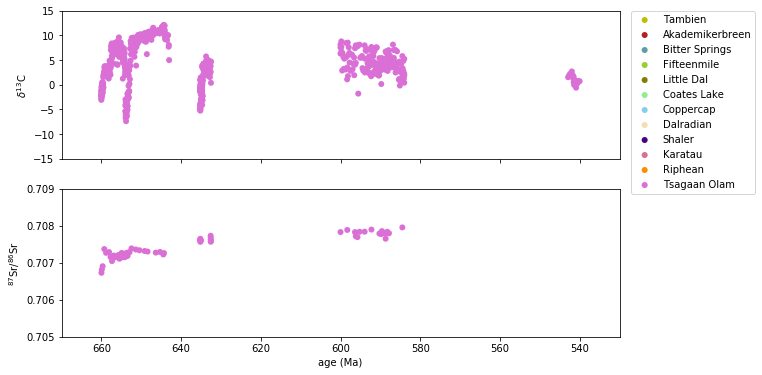

In [88]:
sections.append(TsagaanOlam_B16_data)
colors.append('orchid')
labels.append('Tsagaan Olam')
publications.append('Bold et al. (2016)')
countries.append('Mongolia')
formations.append('Tsagaan-Olam Group')
tonian_comp_plot('age',sections,colors,labels, xlim=[670,530])

### Tsagaan-Olam Group (Brasier et al. 1996)

Data from the Tsagaan-Olam Group of SW Mongolia published in:

In [89]:
TsagaanOlam_B96_data = pd.read_csv('../Data/Composite_Data/TsagaanOlam_B96.csv')

Filter Sr data:

[Sr] threshold set at 500ppm.
[Mn]/[Sr] threshold set at 0.3


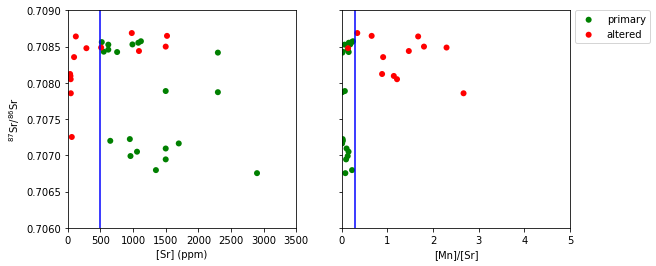

In [90]:
Sr_threshold = 500
MnSr_threshold = 0.3
threshold_visualize([TsagaanOlam_B96_data], Sr_threshold, MnSr_threshold, 0.706, 0.709)

In [91]:
for i in range(len(TsagaanOlam_B96_data.index)):
    MnSr = TsagaanOlam_B96_data['Mn_ppm'][i] / TsagaanOlam_B96_data['Sr_ppm'][i]
    # if Mn/Sr and [Sr] data exists
    if np.isfinite(TsagaanOlam_B96_data['Mn_ppm'][i]):
        if TsagaanOlam_B96_data['Sr_ppm'][i] >= 500 and MnSr <= 0.3:
            TsagaanOlam_B96_data.loc[i, '87Sr/86Sr_primary'] = TsagaanOlam_B96_data['87Sr/86Sr'][i]
    # if only [Sr] data exists
    elif np.isfinite(TsagaanOlam_B96_data['Sr_ppm'][i]):
        if TsagaanOlam_B96_data['Sr_ppm'][i] >= 500:
            TsagaanOlam_B96_data.loc[i, '87Sr/86Sr_primary'] = TsagaanOlam_B96_data['87Sr/86Sr'][i]
    # if neither Mn/Sr nor [Sr] data exists, just accept the value
    else:
        TsagaanOlam_B96_data.loc[i, '87Sr/86Sr_primary'] = TsagaanOlam_B96_data['87Sr/86Sr'][i]

Remove altered C and O:

In [92]:
for i in range(len(TsagaanOlam_B96_data.index)):
    if '*' in TsagaanOlam_B96_data['sample'][i]:
        TsagaanOlam_B96_data.loc[i,'d13C'] = float('NaN')
        TsagaanOlam_B96_data.loc[i,'d18O'] = float('NaN')
    elif type(TsagaanOlam_B96_data['lithology'][i])==str and 'Calcite' not in TsagaanOlam_B96_data['lithology'][i]:
        TsagaanOlam_B96_data.loc[i,'d13C'] = float('NaN')
        TsagaanOlam_B96_data.loc[i,'d18O'] = float('NaN')

Plot data against meter level:

No handles with labels found to put in legend.


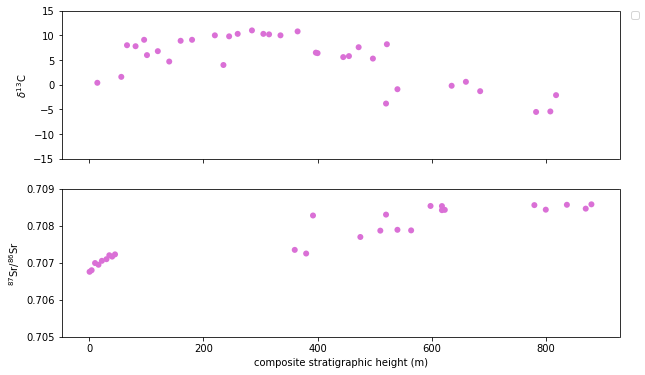

In [93]:
tonian_comp_plot('height',[TsagaanOlam_B96_data],['orchid'],['_nolegend_'])

Develop the age model:

In [94]:
# Taishir Formation
Taishir_B96_data = TsagaanOlam_B96_data[TsagaanOlam_B96_data['strat_m']<=380]
Taishir_B96_data.sort_values('strat_m', inplace=True)
Taishir_B96_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(Taishir_B96_data.index)):
    if Taishir_B96_data['sample'][i] == 'Tsag. 1':
        indices.append(i)
        constraints.append(Taishir1_base)
    elif Taishir_B96_data['sample'][i] == '0-VK16':
        indices.append(i)
        constraints.append(Taishir1_base-18)
age_model(Taishir_B96_data,constraints,indices)

# Zuun-Arts Formation
ZA_B96_data = TsagaanOlam_B96_data[TsagaanOlam_B96_data['strat_m']>=596]
ZA_B96_data.sort_values('strat_m', inplace=True)
ZA_B96_data.reset_index(inplace=True, drop=True)
indices = []
constraints = []
for i in range(len(ZA_B96_data.index)):
    if ZA_B96_data['sample'][i] == 'Bay S1a*':
        indices.append(i)
        constraints.append(ZA_base-1.5)
    elif ZA_B96_data['sample'][i] == '16/B40':
        indices.append(i)
        constraints.append(ZA_top-1.5)
age_model(ZA_B96_data,constraints,indices)

# compile into a single dataframe
TsagaanOlam_B96_data = pd.concat([Taishir_B96_data, ZA_B96_data], ignore_index=True)
TsagaanOlam_B96_data.sort_values('age', inplace=True)
TsagaanOlam_B96_data.reset_index(drop=True,inplace=True)

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_


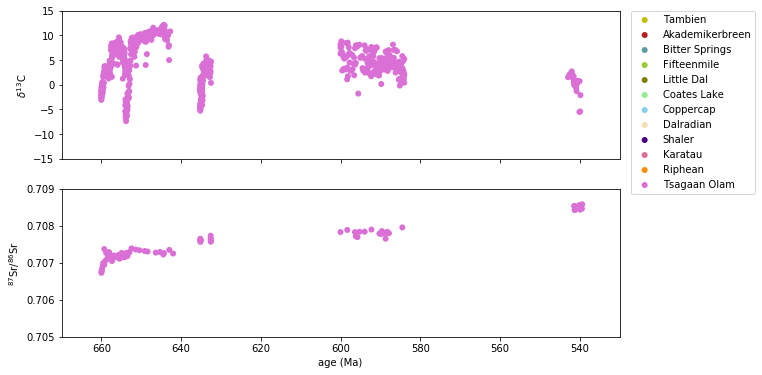

In [95]:
sections.append(TsagaanOlam_B96_data)
colors.append('orchid')
labels.append('_nolegend_')
publications.append('Brasier et al. (1996)')
countries.append('Mongolia')
formations.append('Tsagaan-Olam Group')
tonian_comp_plot('age',sections,colors,labels, xlim=[670,530])

### Hay Creek Group (Rooney et al., 2014)

Data from the Hay Creek Group of NW Canada published in:

In [96]:
Hay_Creek_data = pd.read_csv('../Data/Composite_Data/HayCreek.csv')

Filter Sr data:

In [97]:
for i in range(len(Hay_Creek_data.index)):
    # keep 87Sr/86Sr data that lacks [Sr]
    if np.isnan(Hay_Creek_data['Sr_ppm'][i]):
        Hay_Creek_data.loc[i,'87Sr/86Sr_primary'] = Hay_Creek_data['87Sr/86Sr'][i]
    # filter based on carbonate percent and [Sr] thresholds, and 87Sr/86Sr variance
    elif Hay_Creek_data['carb_percent'][i]>=90 and\
         Hay_Creek_data['Sr_ppm'][i]>=650 and\
         Hay_Creek_data['87Sr/86Sr'][i]<=0.7075:
        Hay_Creek_data.loc[i,'87Sr/86Sr_primary'] = Hay_Creek_data['87Sr/86Sr'][i]

# remove anomalous point
Hay_Creek_data.loc[1,'87Sr/86Sr_primary'] = float('NaN')

Plot against meter level:

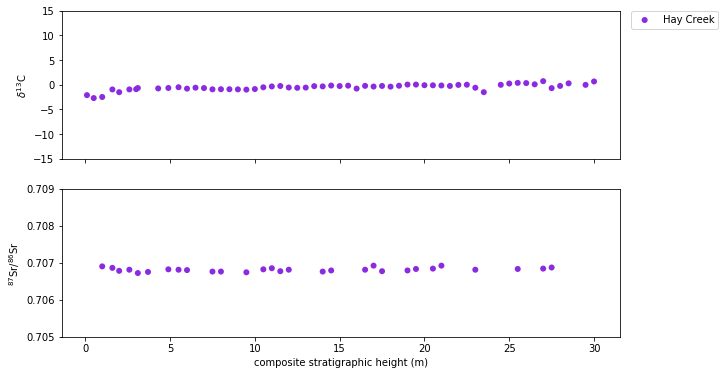

In [98]:
tonian_comp_plot('height',[Hay_Creek_data],['blueviolet'],['Hay Creek'])

Develop the age model:

In [99]:
indices = []
constraints = []
for i in range(len(Hay_Creek_data.index)):
    if Hay_Creek_data['sample'][i] == 0.1:
        indices.append(i)
        constraints.append(Taishir1_base)
    elif Hay_Creek_data['sample'][i] == 30.0:
        indices.append(i)
        constraints.append(Taishir1_base-0.25)

age_model(Hay_Creek_data,constraints,indices)

Plot against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_


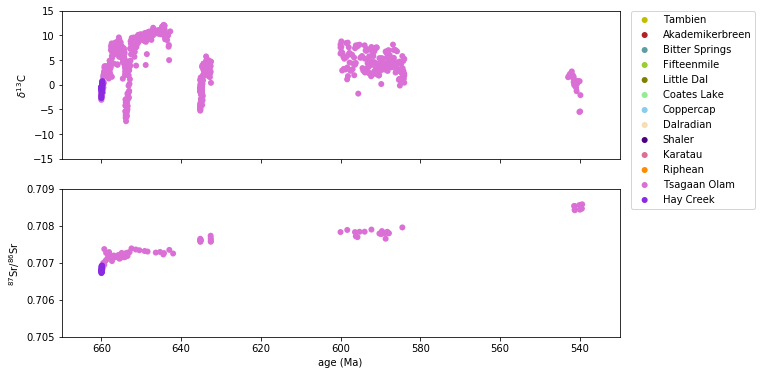

In [100]:
sections.append(Hay_Creek_data)
colors.append('blueviolet')
labels.append('Hay Creek')
publications.append('Rooney et al. (2014)')
countries.append('Canada')
formations.append('Hay Creek Group')
tonian_comp_plot('age',sections,colors,labels, xlim=[670,530])

### Adelaide Rift Complex (Swanson-Hysell et al., 2010)

In [101]:
Adelaide_Rift_data = pd.read_csv('../Data/Composite_Data/AdelaideRiftComplex.csv')

for i in range(len(Adelaide_Rift_data.index)):
    if Adelaide_Rift_data['section/core'][i] == 'C215':
        Adelaide_Rift_data.loc[i,'strat_m'] = Adelaide_Rift_data['section_m'][i] + 1000
    else:
        Adelaide_Rift_data.loc[i,'strat_m'] = Adelaide_Rift_data['section_m'][i]
        
Adelaide_Rift_data.sort_values('strat_m',inplace=True)
Adelaide_Rift_data.reset_index(inplace=True, drop=True)

Plot data against meter level:

Sr data not available for Adelaide Rift


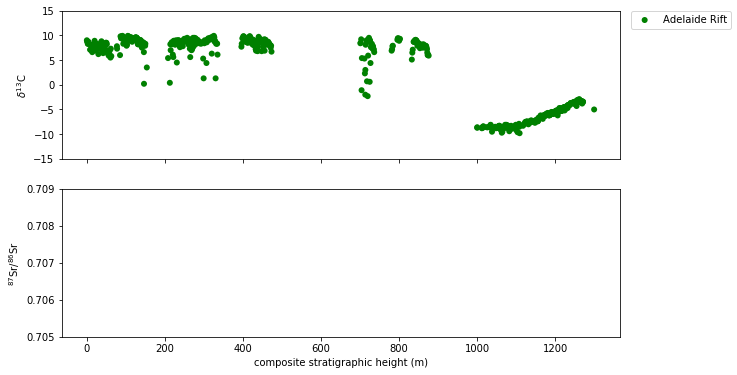

In [102]:
tonian_comp_plot('height',[Adelaide_Rift_data],['green'],['Adelaide Rift'])

Develop the age model:

In [103]:
Marinoan_initiation = 640.7

indices = []
constraints = []
for i in range(len(Adelaide_Rift_data.index)):
    if Adelaide_Rift_data['section_m'][i] == 0.2 and Adelaide_Rift_data['section/core'][i] == 'C227':
        indices.append(i)
        constraints.append(Taishir_nadir+4)
    elif Adelaide_Rift_data['section_m'][i] == 876.0 and Adelaide_Rift_data['section/core'][i] == 'C227':
        indices.append(i)
        constraints.append(Taishir_nadir-2)
    elif Adelaide_Rift_data['section_m'][i] == 0.3 and Adelaide_Rift_data['section/core'][i] == 'C215':
        indices.append(i)
        constraints.append(Marinoan_initiation+1)
    elif Adelaide_Rift_data['section_m'][i] == 300.0 and Adelaide_Rift_data['section/core'][i] == 'C215':
        indices.append(i)
        constraints.append(Marinoan_initiation)

age_model(Adelaide_Rift_data,constraints,indices)

Plot against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_
Sr data not available for Adelaide Rift


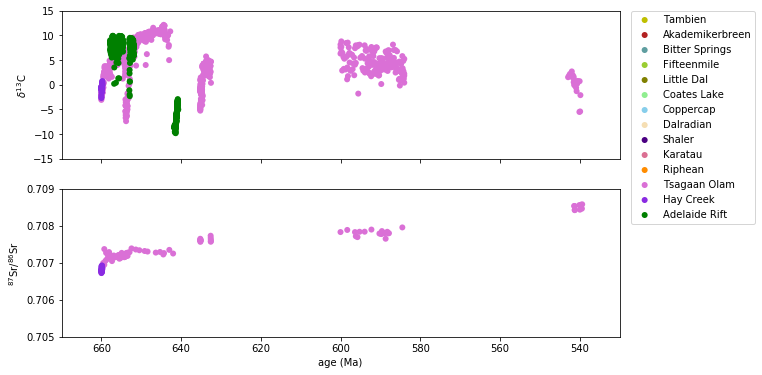

In [104]:
sections.append(Adelaide_Rift_data)
colors.append('green')
labels.append('Adelaide Rift')
publications.append('Swanson-Hysell et al. (2010)')
countries.append('Australia')
formations.append('Amadeus Basin, Adelaide Rift Complex')
tonian_comp_plot('age',sections,colors,labels, xlim=[670,530])

#### Taishir Member (Shields et al., 1997)

Data from the Taishir Member of SW Mongolia published in:

Filter Sr data:

Plot data against meter level:

Develop the age model:

Plot data against age:

Sedimentation rates:

### Otavi Group (Halverson et al., 2007 and Halverson et al., 2005)

Data from the Otavi Group of N Namibia published in:

In [105]:
Otavi_data = pd.read_csv('../Data/Composite_Data/Otavi.csv')

Filter Sr data:

[Sr] threshold set at 500ppm.
[Mn]/[Sr] threshold set at 0.1


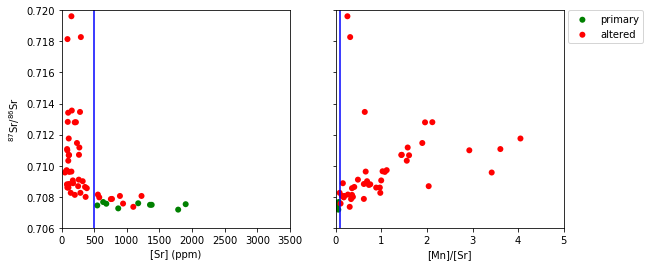

In [106]:
Sr_threshold = 500
MnSr_threshold = 0.1
threshold_visualize([Otavi_data], Sr_threshold, MnSr_threshold, 0.706, 0.720)

In [107]:
# filter based on [Sr]
for i in range(len(Otavi_data.index)):
    if Otavi_data['Sr_ppm'][i]>=800:
        Otavi_data.loc[i,'87Sr/86Sr_primary'] = Otavi_data['87Sr/86Sr'][i]

In [108]:
for i in range(len(Otavi_data.index)):
    if Otavi_data['Sr_ppm'][i]>=500 and Otavi_data['Mn/Sr'][i]<=0.1:
        Otavi_data.loc[i,'87Sr/86Sr_primary'] = Otavi_data['87Sr/86Sr'][i]

Plot data against meter level:

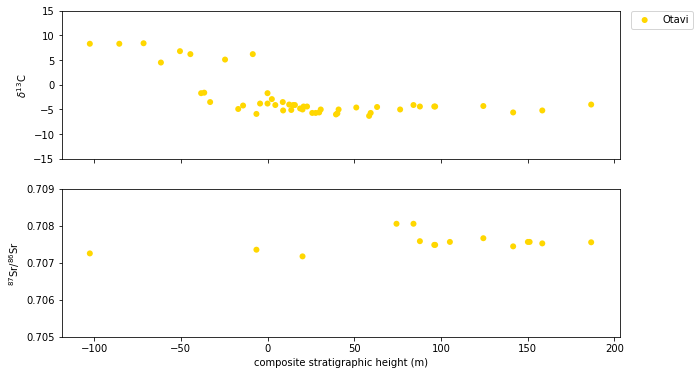

In [109]:
tonian_comp_plot('height',[Otavi_data],['gold'],['Otavi'])

Develop the age model:

In [110]:
Otavi_data.sort_values('strat_m', inplace=True)
Otavi_data.reset_index(inplace=True, drop=True)

indices = []
constraints = []
for i in range(len(Otavi_data.index)):
    if Otavi_data['sample'][i] == 'P1012. 292':
        indices.append(i)
        constraints.append(Marinoan_initiation+3)
    elif Otavi_data['sample'][i] == 'P4006. 348.7':
        indices.append(i)
        constraints.append(Marinoan_initiation+1)
    elif Otavi_data['sample'][i] == 'C46. 0':
        indices.append(i)
        constraints.append(Ol_base)
    elif Otavi_data['sample'][i] == 'P1012. 186.7X':
        indices.append(i)
        constraints.append(Ol_base-1)

age_model(Otavi_data,constraints,indices)

Plot data against age:

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_
Sr data not available for Adelaide Rift


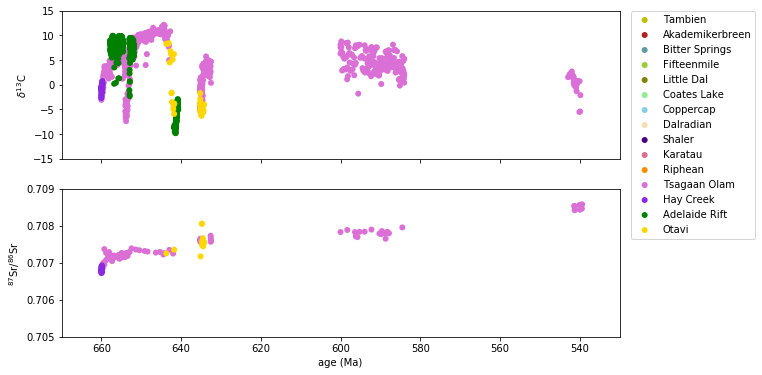

In [111]:
sections.append(Otavi_data)
colors.append('gold')
labels.append('Otavi')
publications.append('Halverson et al. (2005), Halverson et al. (2007)')
countries.append('Namibia')
formations.append('Otavi Group')
tonian_comp_plot('age',sections,colors,labels, xlim=[670,530])

#### Salitre Formation (Misi et Veizer, 1998)

Data from the Salitre Formation of Brazil published in:

Filter Sr data:

Metre level information not given, so for now we will only use data that have assigned ages in Cox et al. (2016):

Plot data against age:

## Data from Cox et al. (2016)

Make some adjustments to the data: adapt assigned ages in Cox et al. (2016) to our age model by matching duplicate samples between the two composites.

In [112]:
Cox2016_data = pd.read_csv('../Data/Composite_Data/Cox2016_composite.csv')

In [113]:
# first sort by the Cox_age
Cox2016_data.sort_values('Cox_age', inplace=True)
Cox2016_data.reset_index(drop=True, inplace=True)
# start the age column
Cox2016_data['age'] = Cox2016_data['Cox_age']

In [114]:
### adjust the age model based on:
# Coppercap
shift_chemostratigraphy(Cox2016_data, 'age',  5, 0, 20, 731.794451)
shift_chemostratigraphy(Cox2016_data, 'age', 18, 5, 20, 733.359782)
# Russoya and Backlundtoppen
shift_chemostratigraphy(Cox2016_data, 'age', 21, 19, 37, 737.738402)
shift_chemostratigraphy(Cox2016_data, 'age', 36, 21, 37, 765.896220)
# Svanbergfjellet and Grusdievbreen
shift_chemostratigraphy(Cox2016_data, 'age', 47, 36, 78, 787.588488)
shift_chemostratigraphy(Cox2016_data, 'age', 59, 47, 78, 796.977172)
shift_chemostratigraphy(Cox2016_data, 'age', 77, 59, 78, 814.950863)

In [115]:
# remove duplicate data
# note that some of the Sr data deemed primary in Cox2016 has been deemed altered in our analysis
Cox2016_new_data = Cox2016_data[(Cox2016_data['reference'] != 'Halverson et al. (2007)') &\
                                (Cox2016_data['reference'] != 'Rooney et al. (2014)')]

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_
Sr data not available for Adelaide Rift


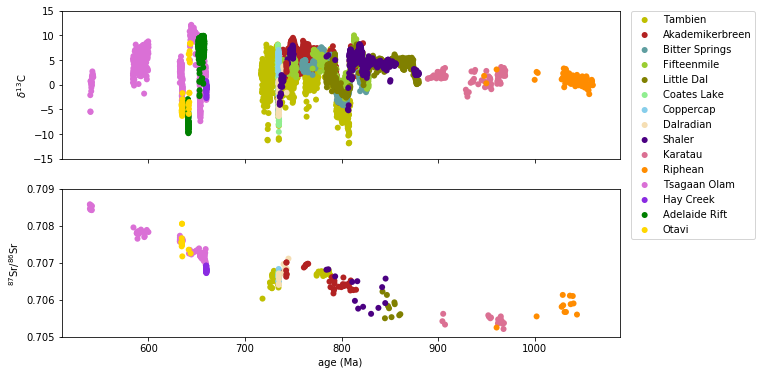

In [116]:
### plot each of the formations separately
# Russoya Member of Akademikerbreen
Cox2016_Russoya = Cox2016_new_data[Cox2016_new_data['unit']=='Russoya Mb.']
Cox2016_Russoya.reset_index(inplace=True, drop=True)
sections.append(Cox2016_Russoya)
colors.append('Firebrick')
labels.append('_nolegend_')
publications.append('Cox et al. (2016)')
countries.append('Svalbard')
formations.append('Akademikerbreen Group')
tonian_comp_plot('age',sections,colors,labels)

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_
Sr data not available for Adelaide Rift


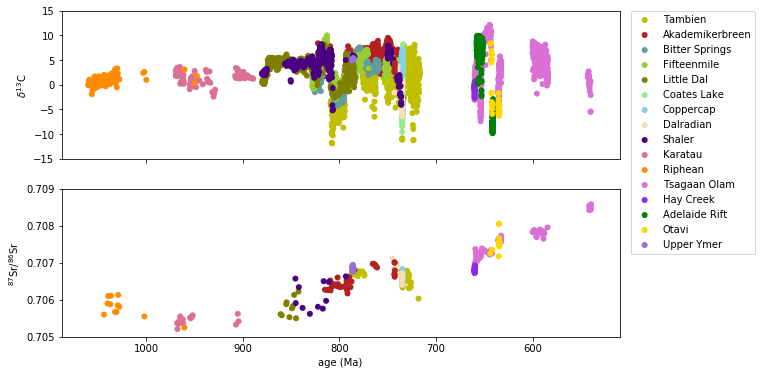

In [117]:
# Upper Ymer Group
Cox2016_Upper_Ymer = Cox2016_new_data[Cox2016_new_data['unit']=='Upper Ymer Gp.']
Cox2016_Upper_Ymer.reset_index(inplace=True, drop=True)
sections.append(Cox2016_Upper_Ymer)
colors.append('mediumpurple')
labels.append('Upper Ymer')
publications.append('Cox et al. (2016)')
countries.append('Greenland')
formations.append('Upper Ymer Group')
tonian_comp_plot('age',sections,colors,labels)

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_
Sr data not available for Adelaide Rift


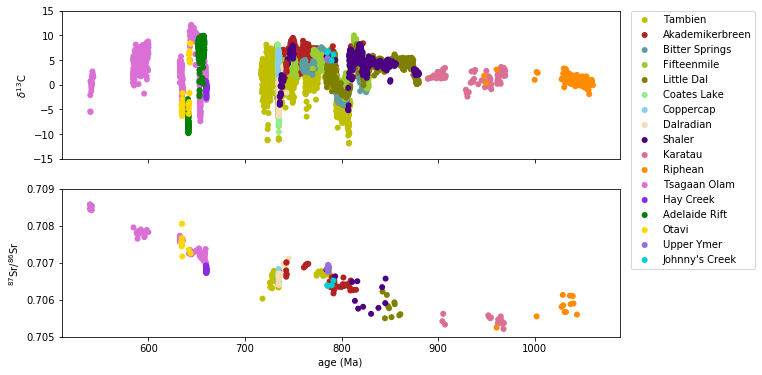

In [118]:
# Johnny's Creek
Cox2016_Johnnys_Creek = Cox2016_new_data[Cox2016_new_data['unit']=='Johnny\'s Creek Mb.']
Cox2016_Johnnys_Creek.reset_index(inplace=True, drop=True)
sections.append(Cox2016_Johnnys_Creek)
colors.append('darkturquoise')
labels.append('Johnny\'s Creek')
publications.append('Cox et al. (2016)')
countries.append('Australia')
formations.append('Bitter Springs Formation')
tonian_comp_plot('age',sections,colors,labels)

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_
Sr data not available for Adelaide Rift


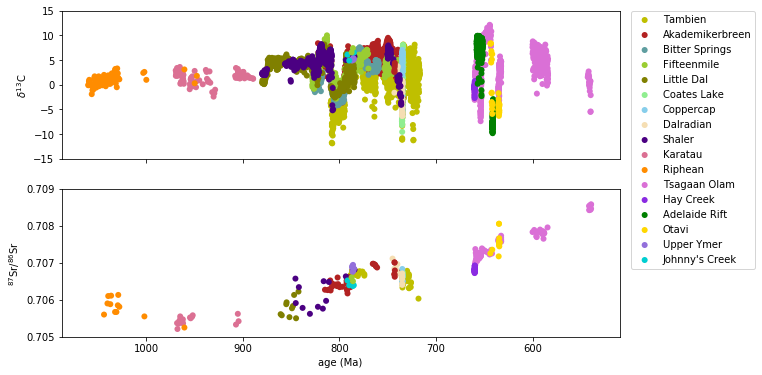

In [119]:
# Upper Shale of Fifteenmile
Cox2016_Fifteenmile = Cox2016_new_data[Cox2016_new_data['unit']=='Upper Shale']
Cox2016_Fifteenmile.reset_index(inplace=True, drop=True)
sections.append(Cox2016_Fifteenmile)
colors.append('YellowGreen')
labels.append('_nolegend_')
publications.append('Cox et al. (2016)')
countries.append('Canada')
formations.append('Fifteenmile Group')
tonian_comp_plot('age',sections,colors,labels)

Sr data not available for Bitter Springs
Sr data not available for Fifteenmile
Sr data not available for _nolegend_
Sr data not available for Adelaide Rift


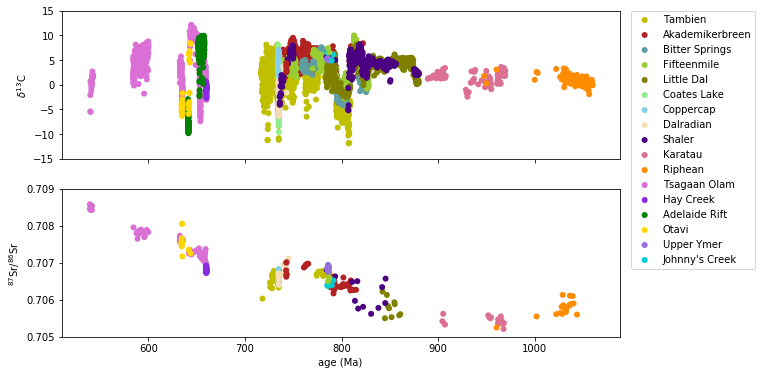

In [120]:
# Sukhaya Tunguska of the Riphean Transition
Cox2016_Sukhaya_Tunguska = Cox2016_new_data[Cox2016_new_data['unit']=='Sukhaya Tunguska Fm.']
Cox2016_Sukhaya_Tunguska.reset_index(inplace=True, drop=True)
sections.append(Cox2016_Sukhaya_Tunguska)
colors.append('darkorange')
labels.append('_nolegend_')
publications.append('Cox et al. (2016)')
countries.append('Siberia')
formations.append('Riphean Transition')
tonian_comp_plot('age',sections,colors,labels)

## Output .csv

In [121]:
# append columns
for i in range(len(sections)):
    for j in range(len(sections[i].index)):
        sections[i].loc[j,'reference'] = publications[i]
        sections[i].loc[j,'country'] = countries[i]
        sections[i].loc[j,'formation'] = formations[i]
        sections[i].loc[j,'label'] = labels[i]

# concatenate
Tonian = pd.concat(sections, ignore_index=True)

# sort
Tonian.sort_values(by=['reference','strat_m'], inplace=True)
Tonian = Tonian.reset_index(drop=True)

# re-order columns
cols = ['formation', 'country', 'reference', 'label', 'age', 'strat_m', 'd13C', 'd18O','87Sr/86Sr_primary']
Tonian = Tonian[cols]

# round numbers:
Tonian['age'] = np.round(Tonian['age'],3)
Tonian['strat_m'] = np.round(Tonian['strat_m'],1)
Tonian['d13C'] = np.round(Tonian['d13C'],2)
Tonian['d18O'] = np.round(Tonian['d18O'],2)
Tonian['87Sr/86Sr_primary'] = np.round(Tonian['87Sr/86Sr_primary'],6)

# .csv output
Tonian.to_csv('../Data/Composite_Data/Tonian_Cryogenian_Composite_data.csv')

/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


## LOWESS Fits

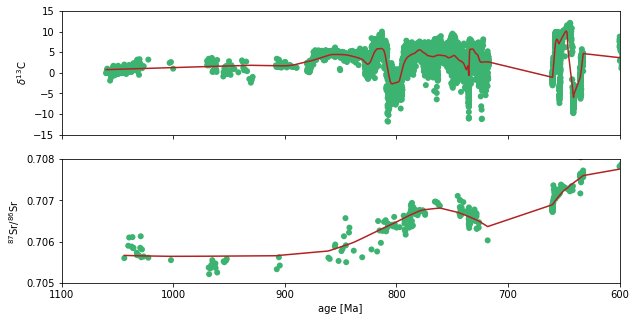

In [122]:
import statsmodels.api as sm

xy_d13C = sm.nonparametric.lowess(Tonian['d13C'], Tonian['age'], frac=0.05)
xy_87Sr86Sr = sm.nonparametric.lowess(Tonian['87Sr/86Sr_primary'], Tonian['age'], frac=0.3)

fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)

ax[0].scatter(Tonian['age'], Tonian['d13C'], facecolor='mediumseagreen', edgecolor='none')
ax[0].plot(xy_d13C[:,0], xy_d13C[:,1], color='firebrick')
ax[0].set_ylim(-15,15)
ax[0].set_ylabel('$\delta^{13}$C')

ax[1].scatter(Tonian['age'], Tonian['87Sr/86Sr_primary'], facecolor='mediumseagreen', edgecolor='none')
ax[1].plot(xy_87Sr86Sr[:,0], xy_87Sr86Sr[:,1], color='firebrick')
ax[1].set_xlim(1100,600)
ax[1].set_xlabel('age [Ma]')
ax[1].set_ylim(0.705,0.708)
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')
plt.show(fig)

## 2D Histogram

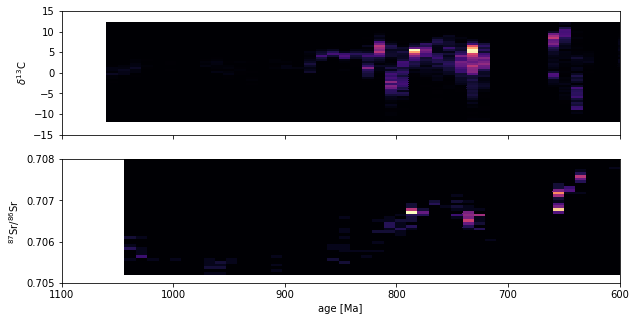

In [123]:
Tonian_d13C = np.array([])
Tonian_age_d13C = np.array([])
Tonian_87Sr86Sr = np.array([])
Tonian_age_87Sr86Sr = np.array([])

for i in range(len(Tonian.index)):
    if np.isfinite(Tonian['d13C'][i]) and np.isfinite(Tonian['age'][i]):
        Tonian_d13C = np.append(Tonian_d13C, Tonian['d13C'][i])
        Tonian_age_d13C = np.append(Tonian_age_d13C, Tonian['age'][i])
    if np.isfinite(Tonian['87Sr/86Sr_primary'][i]) and np.isfinite(Tonian['age'][i]):
        Tonian_87Sr86Sr = np.append(Tonian_87Sr86Sr, Tonian['87Sr/86Sr_primary'][i])
        Tonian_age_87Sr86Sr = np.append(Tonian_age_87Sr86Sr, Tonian['age'][i])

fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)

ax[0].hist2d(Tonian_age_d13C, Tonian_d13C, bins=50, cmap='magma')
ax[0].set_ylim(-15,15)
ax[0].set_ylabel('$\delta^{13}$C')

ax[1].hist2d(Tonian_age_87Sr86Sr, Tonian_87Sr86Sr, bins=50, cmap='magma')
ax[1].set_xlim(1100,600)
ax[1].set_xlabel('age [Ma]')
ax[1].set_ylim(0.705,0.708)
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')

plt.show(fig)

## Composite Plot < Marinoan

In [124]:
AGU_symbols = ['o']
for i in range(len(countries)):
    if countries[i] == 'Svalbard':
        AGU_symbols.append('v')
    elif countries[i] == 'Australia':
        AGU_symbols.append('^')
    elif countries[i] == 'Canada':
        AGU_symbols.append('<')
    elif countries[i] == 'Scotland':
        AGU_symbols.append('>')
    elif countries[i] == 'Siberia':
        AGU_symbols.append('p')
    elif countries[i] == 'Mongolia':
        AGU_symbols.append('s')
    elif countries[i] == 'Namibia':
        AGU_symbols.append('h')
    elif countries[i] == 'Greenland':
        AGU_symbols.append('D')

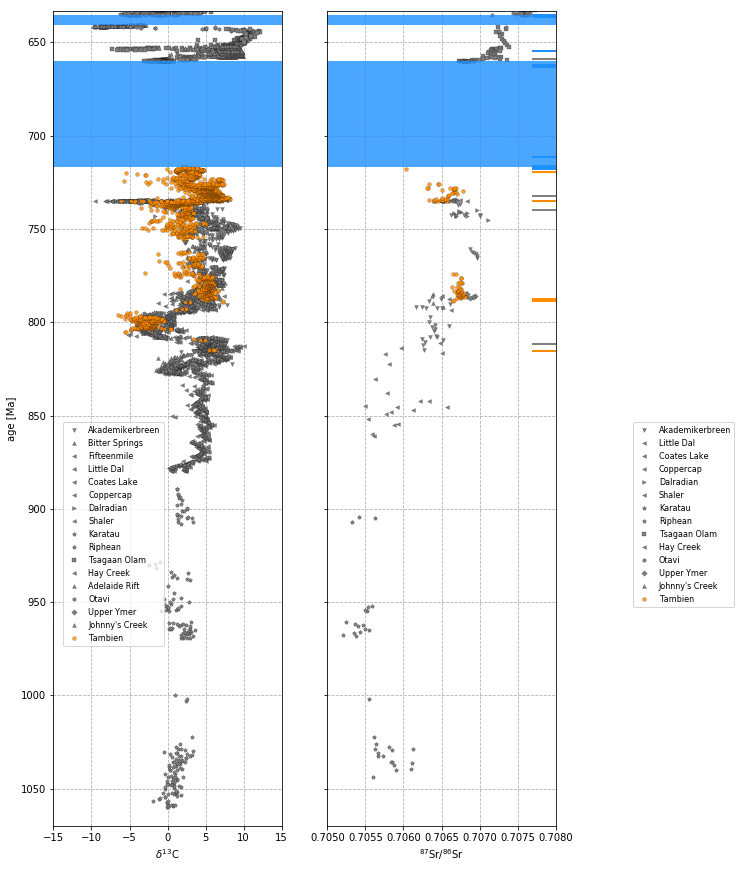

In [125]:
fig, ax = plt.subplots(1,2,figsize=(9,15),sharey=True)

# d13C
for i in range(1,len(sections)):
    ax[0].scatter(sections[i]['d13C'],sections[i]['age'],\
                  facecolor='grey',edgecolor='k',label=labels[i],marker=AGU_symbols[i],linewidth=0.2,s=15)

# 87Sr/86Sr
for i in range(1,len(sections)):
    if '87Sr/86Sr_primary' in sections[i].columns:
        ax[1].scatter(sections[i]['87Sr/86Sr_primary'],sections[i]['age'],\
                      facecolor='grey',edgecolor='k',label=labels[i],marker=AGU_symbols[i],linewidth=0.2,s=15)
        
# Tambien Group with filter applied for d13C
#ax[0].scatter(Tambien_data[Tambien_data['si_d']<0.2]['d13C'],Tambien_data[Tambien_data['si_d']<0.2]['age'],\
#              facecolor='none',label='Tambien',alpha=0.8,edgecolor='darkorange',linewidth=0.4,s=15)
ax[0].scatter(Tambien_data[Tambien_data['si_d']>=0.2]['d13C'],Tambien_data[Tambien_data['si_d']>=0.2]['age'],\
              color='darkorange',label='Tambien',alpha=0.8,edgecolor='k',linewidth=0.2,s=15)
ax[1].scatter(Tambien_data['87Sr/86Sr_primary'],Tambien_data['age'],\
              color='darkorange',label='Tambien',alpha=0.8,edgecolor='k',linewidth=0.2,s=15)
        
# the glacials
ax[0].add_patch(patches.Rectangle((-15,Sturtian_initiation),30,Taishir1_base-Sturtian_initiation,\
                                  facecolor='dodgerblue',alpha=0.8))
ax[0].add_patch(patches.Rectangle((-15,Marinoan_initiation),30,Ol_base-Marinoan_initiation,\
                                  facecolor='dodgerblue',alpha=0.8))

ax[1].add_patch(patches.Rectangle((0.705,Sturtian_initiation),0.003,Taishir1_base-Sturtian_initiation,\
                                  facecolor='dodgerblue',alpha=0.8))
ax[1].add_patch(patches.Rectangle((0.705,Marinoan_initiation),0.003,Ol_base-Marinoan_initiation,\
                                  facecolor='dodgerblue',alpha=0.8))
    
# age constraints
Tambien_ages = [815.29,788.72,787.38,735.25,719.68,719.58]
other_ages = [811.5,739.9,732.2,659.0]
glacial_ages = [719.5,718.1,718.1,717.8,717.7,717.4,716.9,716.5,711.5,663.03,662.9,662.4,654.5,636.4,635.5,635.5,635.2]

for i in range(len(other_ages)):
    ax[1].axhline(y=other_ages[i],xmin=0.9,xmax=1,color='grey',lw=2)
for i in range(len(glacial_ages)):
    ax[1].axhline(y=glacial_ages[i],xmin=0.9,xmax=1,color='dodgerblue',lw=2)
for i in range(len(Tambien_ages)):
    ax[1].axhline(y=Tambien_ages[i],xmin=0.9,xmax=1,color='darkorange',lw=2)

        
# prettify
ax[0].set_ylim(1070,633)
ax[0].set_xlim(-15,15)
ax[0].set_axisbelow(True)
ax[0].grid(ls='--')
ax[0].set_ylabel('age [Ma]')
ax[0].set_xlabel('$\delta^{13}$C')
ax[1].set_xlabel('$^{87}$Sr/$^{86}$Sr')
ax[1].set_xlim(0.705,0.708)
ax[0].legend(bbox_to_anchor=(0.5,0.5),fontsize=8)
ax[1].legend(bbox_to_anchor=(1.8,0.5),fontsize=8)
ax[1].set_axisbelow(True)
ax[1].grid(ls='--')

#plt.savefig('Output/Tonian_Composite.svg')

plt.show(fig)

## Islay Anomaly Composite Plot

A version that goes up to the Sturtian:

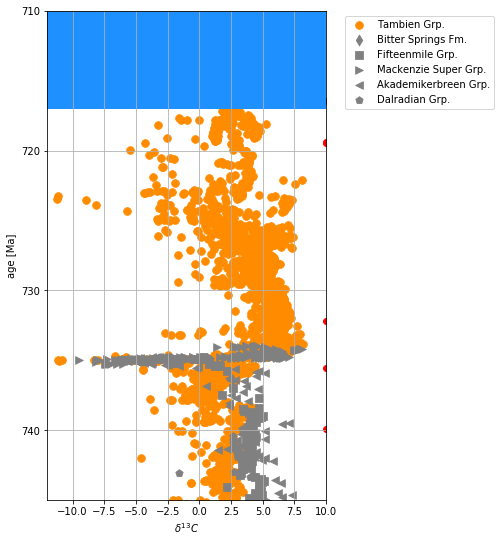

In [126]:
import matplotlib.patches as patches

# set up the figure
fig, ax = plt.subplots(figsize=(5,9))

# some constants
x_lowerlim = -12
x_upperlim = 10
y_lowerlim = 745
y_upperlim = 710
linewidth = 0.75
markersize = 60

# Tambien data
#Negash_scatter = ax.scatter(Negash_data['d13C'],Negash_data['age'],\
#                            c='darkorange',marker='o',linewidth=linewidth,s=markersize,\
#                            label='Negash Syncline')
#Samre_scatter  = ax.scatter(Samre_data['d13C'],Samre_data['age'],\
#                            c='deepskyblue',marker='o',linewidth=linewidth,s=markersize,\
#                            label='Samre Fold/Thrust Belt')
Tambien_scatter = ax.scatter(Tambien_data['d13C'],Tambien_data['age'],\
                             c='darkorange',marker='o',linewidth=linewidth,s=markersize,\
                             label='Tambien Grp.')

# other data
BSF_scatter         = ax.scatter(BSF_data['d13C'],BSF_data['age'],\
                                 c='grey',marker='d',linewidth=linewidth,s=markersize,\
                                 label='Bitter Springs Fm.')
Fifteenmile_scatter = ax.scatter(Fifteenmile_data['d13C'],Fifteenmile_data['age'],\
                                 c='grey',marker='s',linewidth=linewidth,s=markersize,\
                                 label='Fifteenmile Grp.')
LittleDal_scatter   = ax.scatter(LittleDal_data['d13C'],LittleDal_data['age'],\
                                 c='grey',marker='>',linewidth=linewidth,s=markersize,\
                                 label='Mackenzie Super Grp.')
CoatesLake_scatter  = ax.scatter(CoatesLake_data['d13C'],CoatesLake_data['age'],\
                                 c='grey',marker='>',linewidth=linewidth,s=markersize,\
                                 label='_Mackenzie Super Grp.')
Akadem_scatter      = ax.scatter(Akadem_data['d13C'],Akadem_data['age'],\
                                 c='grey',marker='<',linewidth=linewidth,s=markersize,\
                                 label='Akademikerbreen Grp.')
Dalradian_scatter   = ax.scatter(Dalradian_data['d13C'],Dalradian_data['age'],\
                                 c='grey',marker='p',linewidth=linewidth,s=markersize,\
                                 label='Dalradian Super Grp.')
Coppercap_scatter   = ax.scatter(Coppercap_data['d13C'],Coppercap_data['age'],\
                                 c='grey',marker='>',linewidth=linewidth,s=markersize,\
                                 label='_Mackenzie Super Grp.')

# the glacial
ax.add_patch(patches.Rectangle((x_lowerlim,Sturtian_initiation),\
                               x_upperlim-x_lowerlim,\
                               y_upperlim-Sturtian_initiation,\
                               facecolor='dodgerblue'))

# age markers - old constraints
ax.scatter(10, 739.90, c='r')
ax.scatter(10, 732.20, c='r')
ax.scatter(10, 716.47, c='r')

# age markers - new constraints
ax.scatter(10, 735.54, c='r')
ax.scatter(10, 719.49, c='r')
ax.scatter(10, 719.38, c='r')

# legend
scatters = (Tambien_scatter,\
            BSF_scatter,Fifteenmile_scatter,LittleDal_scatter,Akadem_scatter,Dalradian_scatter)
labels = ('Tambien Grp.',\
          'Bitter Springs Fm.','Fifteenmile Grp.','Mackenzie Super Grp.','Akademikerbreen Grp.','Dalradian Grp.')
ax.legend(scatters,labels,scatterpoints=1,\
          bbox_to_anchor=(1.05,1), loc=2)

# prettify
ax.set_xlabel('$\delta^{13}C$')
ax.set_ylabel('age [Ma]')
ax.set_ylim(y_lowerlim,y_upperlim)
ax.set_xlim(x_lowerlim,x_upperlim)
ax.set_yticks([740,730,720,710])
ax.grid()

plt.show(fig)

A version that looks solely at the Islay:

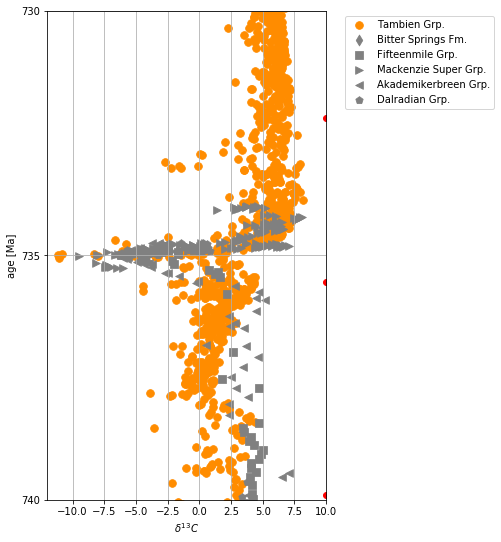

In [127]:
# set up the figure
fig, ax = plt.subplots(figsize=(5,9))

# some constants
x_lowerlim = -12
x_upperlim = 10
y_lowerlim = 740
y_upperlim = 730
linewidth = 0.75
markersize = 60

# Tambien data
#Negash_scatter = ax.scatter(Negash_data['d13C'],Negash_data['age'],\
#                            c='darkorange',marker='o',linewidth=linewidth,s=markersize,\
#                            label='Negash Syncline')
#Samre_scatter  = ax.scatter(Samre_data['d13C'],Samre_data['age'],\
#                            c='deepskyblue',marker='o',linewidth=linewidth,s=markersize,\
#                            label='Samre Fold/Thrust Belt')
Tambien_scatter = ax.scatter(Tambien_data['d13C'],Tambien_data['age'],\
                             c='darkorange',marker='o',linewidth=linewidth,s=markersize,\
                             label='Tambien Grp.')

# other data
BSF_scatter         = ax.scatter(BSF_data['d13C'],BSF_data['age'],\
                                 c='grey',marker='d',linewidth=linewidth,s=markersize,\
                                 label='Bitter Springs Fm.')
Fifteenmile_scatter = ax.scatter(Fifteenmile_data['d13C'],Fifteenmile_data['age'],\
                                 c='grey',marker='s',linewidth=linewidth,s=markersize,\
                                 label='Fifteenmile Grp.')
LittleDal_scatter   = ax.scatter(LittleDal_data['d13C'],LittleDal_data['age'],\
                                 c='grey',marker='>',linewidth=linewidth,s=markersize,\
                                 label='Mackenzie Super Grp.')
CoatesLake_scatter  = ax.scatter(CoatesLake_data['d13C'],CoatesLake_data['age'],\
                                 c='grey',marker='>',linewidth=linewidth,s=markersize,\
                                 label='_Mackenzie Super Grp.')
Akadem_scatter      = ax.scatter(Akadem_data['d13C'],Akadem_data['age'],\
                                 c='grey',marker='<',linewidth=linewidth,s=markersize,\
                                 label='Akademikerbreen Grp.')
Dalradian_scatter   = ax.scatter(Dalradian_data['d13C'],Dalradian_data['age'],\
                                 c='grey',marker='p',linewidth=linewidth,s=markersize,\
                                 label='Dalradian Super Grp.')
Coppercap_scatter   = ax.scatter(Coppercap_data['d13C'],Coppercap_data['age'],\
                                 c='grey',marker='>',linewidth=linewidth,s=markersize,\
                                 label='_Mackenzie Super Grp.')

# age markers - old constraints
ax.scatter(10, 739.90, c='r')
ax.scatter(10, 732.20, c='r')

# age markers - new constraints
ax.scatter(10, 735.54, c='r')

# legend
scatters = (Tambien_scatter,\
            BSF_scatter,Fifteenmile_scatter,LittleDal_scatter,Akadem_scatter,Dalradian_scatter)
labels = ('Tambien Grp.',\
          'Bitter Springs Fm.','Fifteenmile Grp.','Mackenzie Super Grp.','Akademikerbreen Grp.','Dalradian Grp.')
ax.legend(scatters,labels,scatterpoints=1,\
          bbox_to_anchor=(1.05,1), loc=2)

# prettify
ax.set_xlabel('$\delta^{13}C$')
ax.set_ylabel('age [Ma]')
ax.set_ylim(y_lowerlim,y_upperlim)
ax.set_xlim(x_lowerlim,x_upperlim)
ax.set_yticks([740,735,730])
ax.grid()

plt.show(fig)